# IE 360 Project

**Murat Öztürk/Yasin Seçal**

## 1. Introduction

Introduction paragraph

Looking at the positions of the solar panels from the map, some latitudes & altitudes were removed.

## 2. Exploring the data

### 2.1. Correlation

In [16]:
data.avg = prepare_data(add_features=FALSE, return_avg=TRUE)

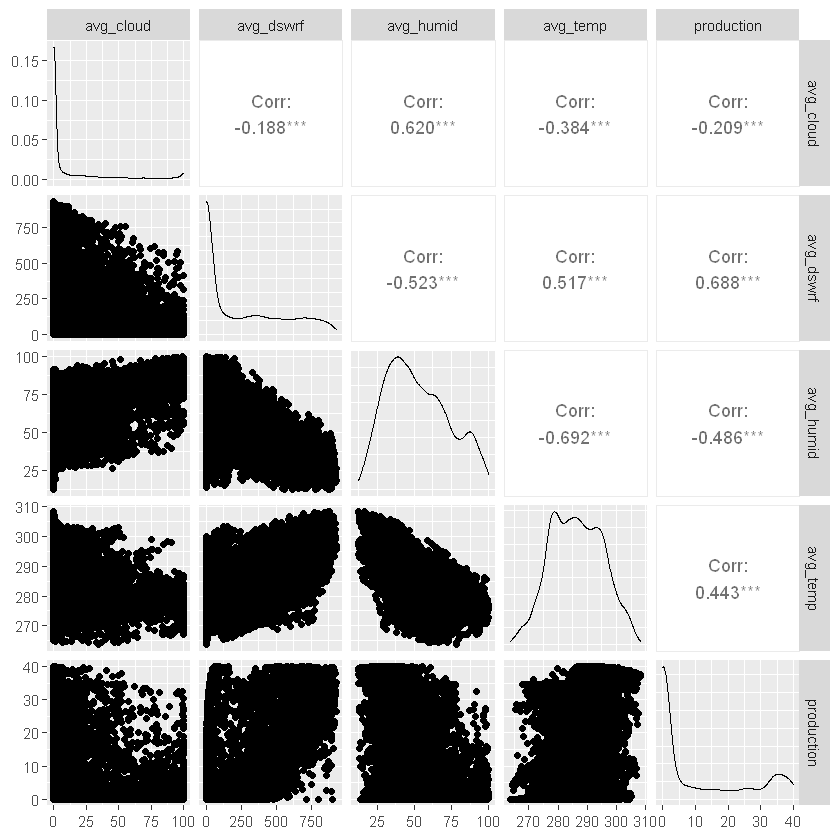

In [16]:
ggpairs(data.avg[,-c(1,2,3)])

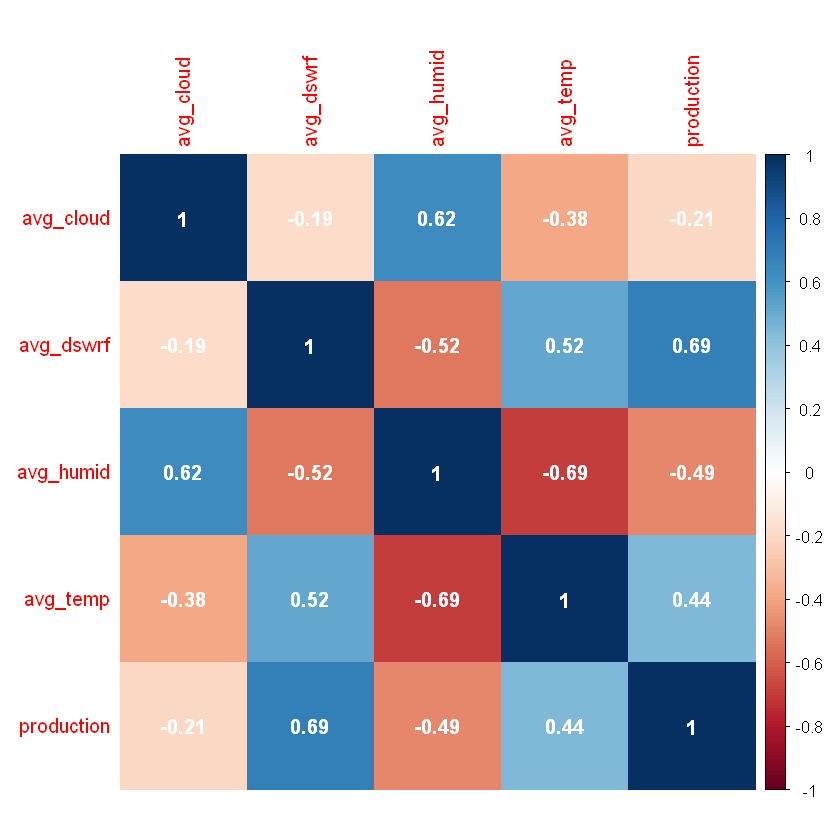

In [17]:
corrplot(cor(data.avg[,-c(1,2,3)]), method='color', addCoef.col="white")

### 2.2. Analysis of Response variable

In [17]:
data = prepare_data(add_features=FALSE)

Hourly

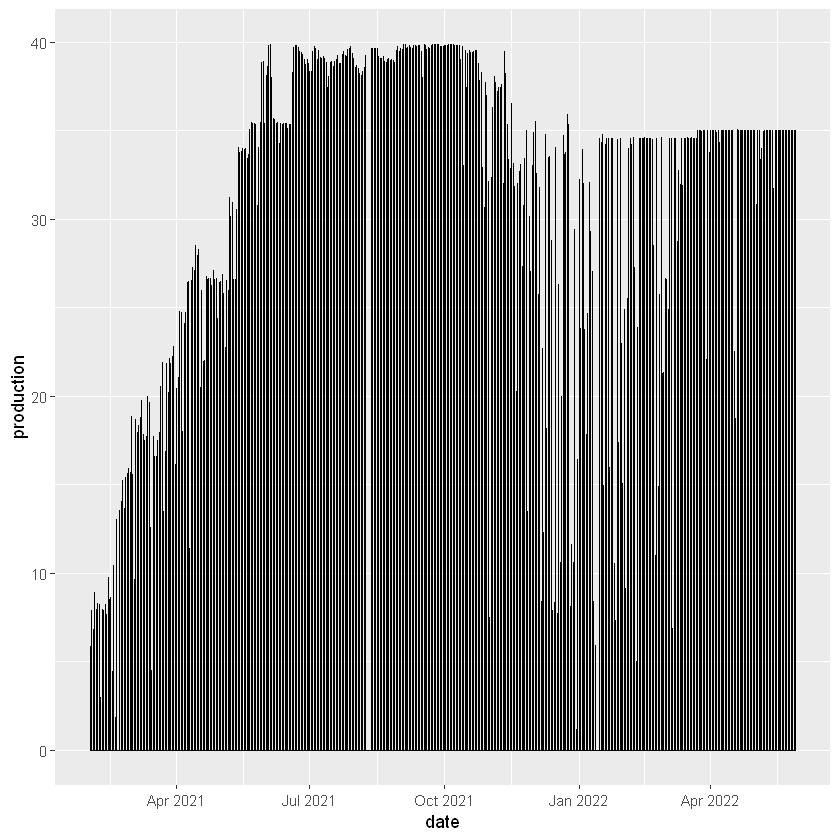

In [19]:
ggplot(data = data, aes(x=date)) +
    geom_line(aes(y=production))

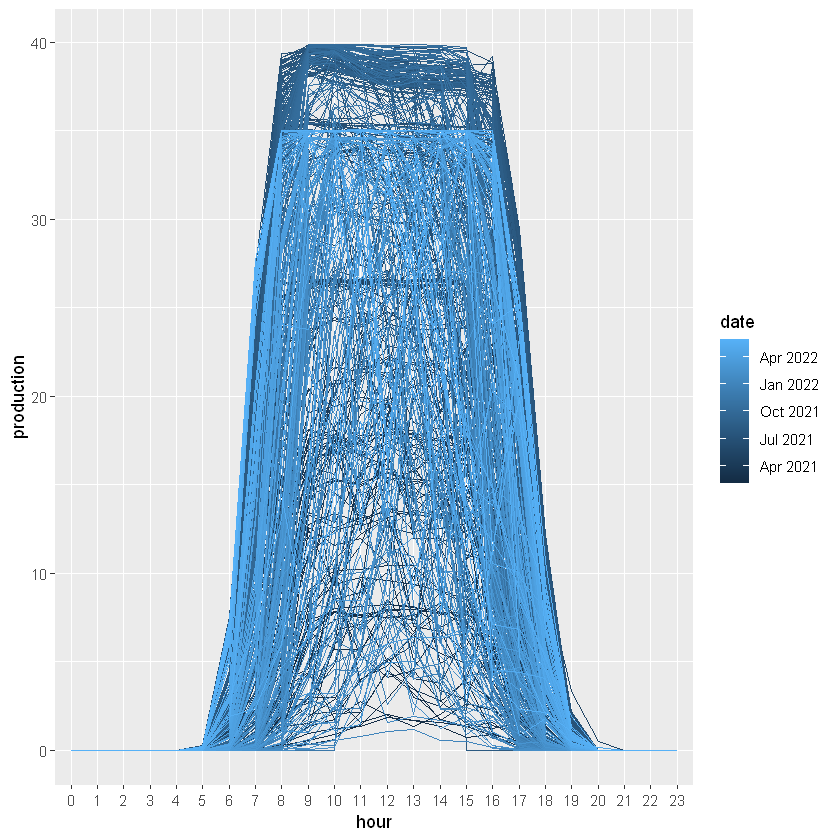

In [77]:
ggplot(data = data[date>='2021-01-01' & date<='2022-07-01'], aes(x=hour, group=date)) +
    geom_line(aes(y=production, color=date))

In [20]:
production = ts(data$production, frequency=24)

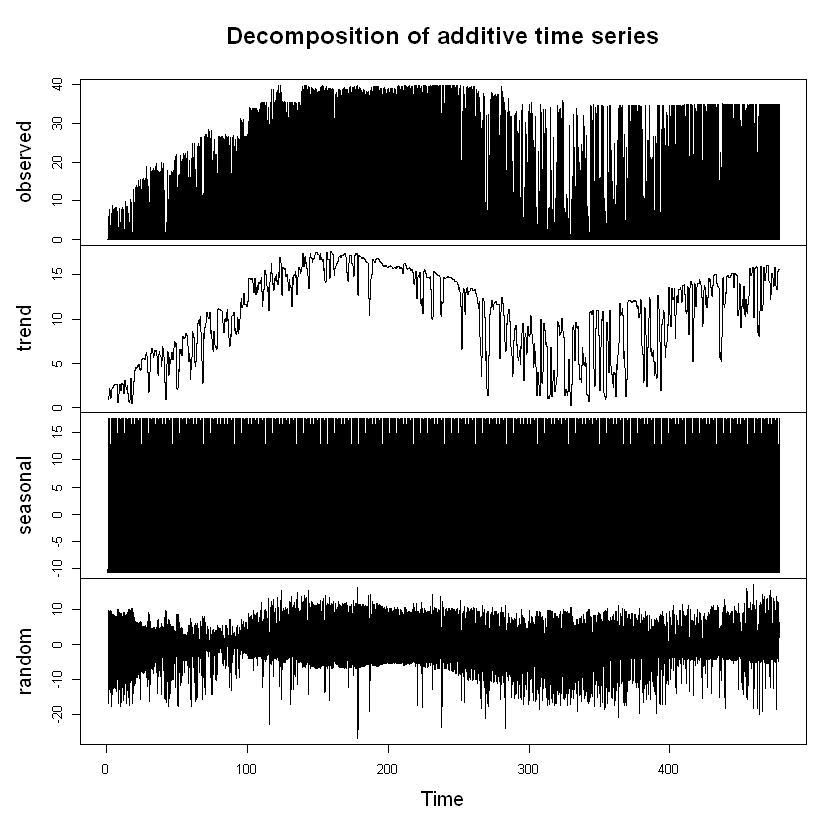

In [21]:
plot(decompose(production))

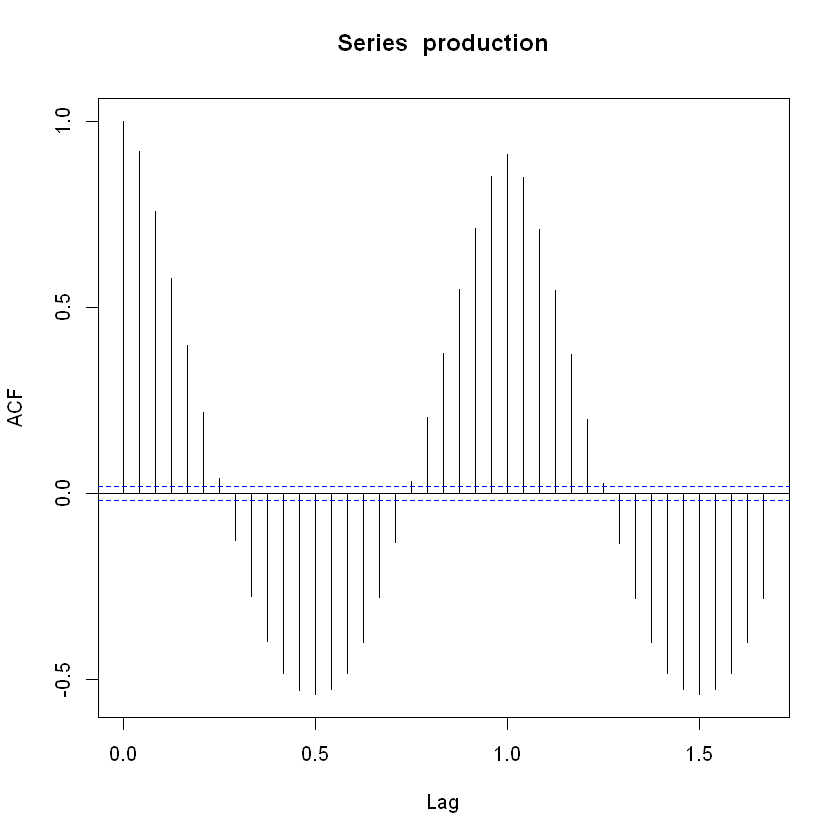

In [22]:
acf(production)

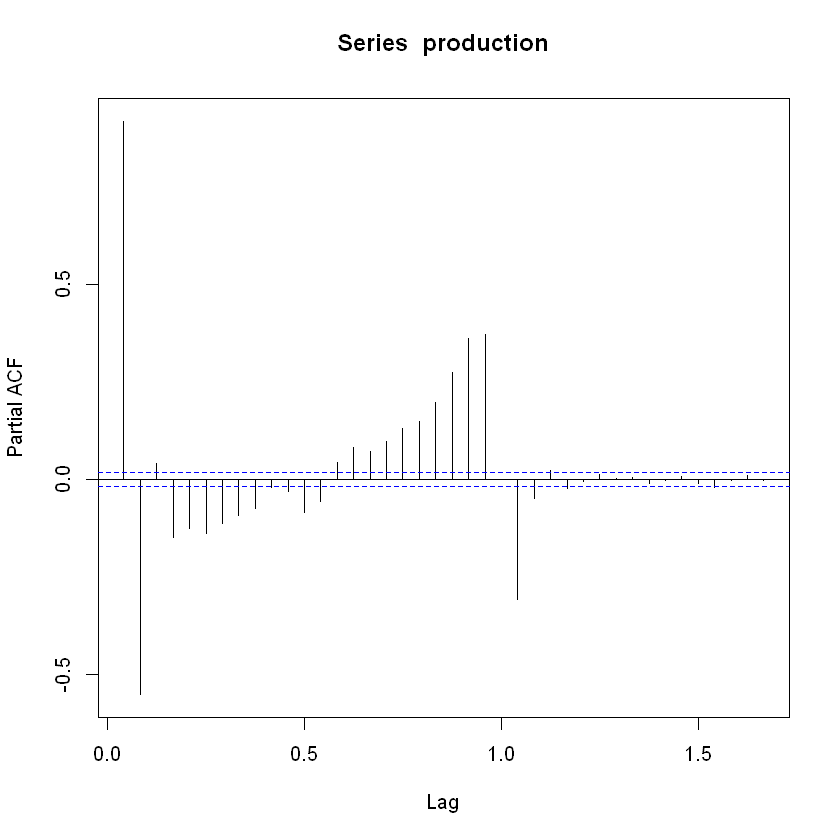

In [23]:
pacf(production)

Daily, aggreagated

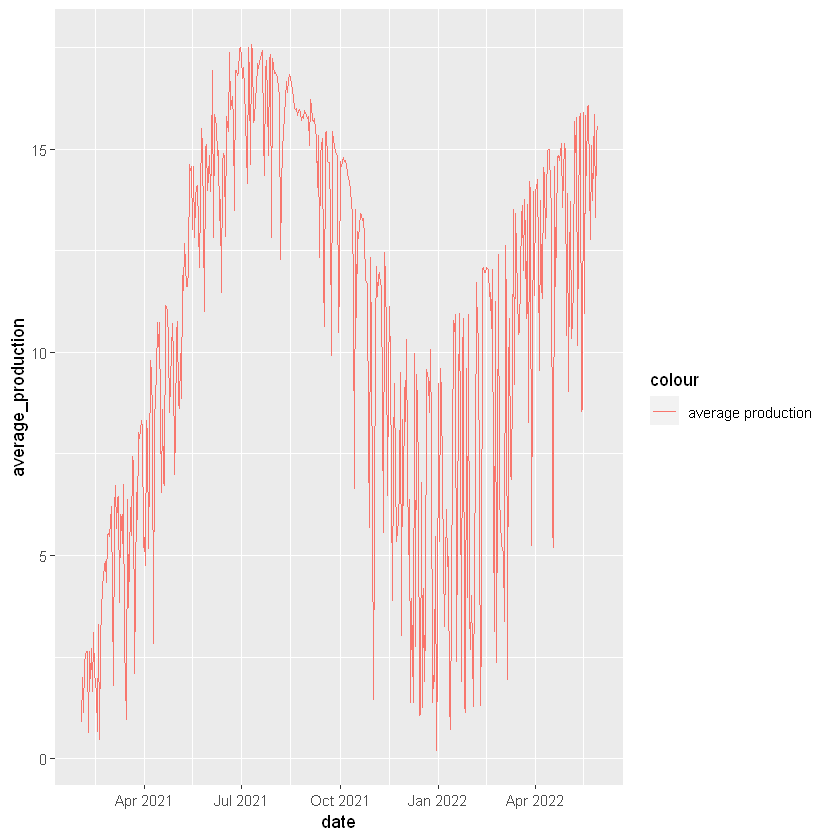

In [24]:
daily.data = data[,list(average_production=mean(production)), list(date)]
ggplot(daily.data, aes(x=date)) +
        geom_line(aes(y = average_production, color='average production'))

In [25]:
production_daily_avg = ts(daily.data$average_production, frequency=365)

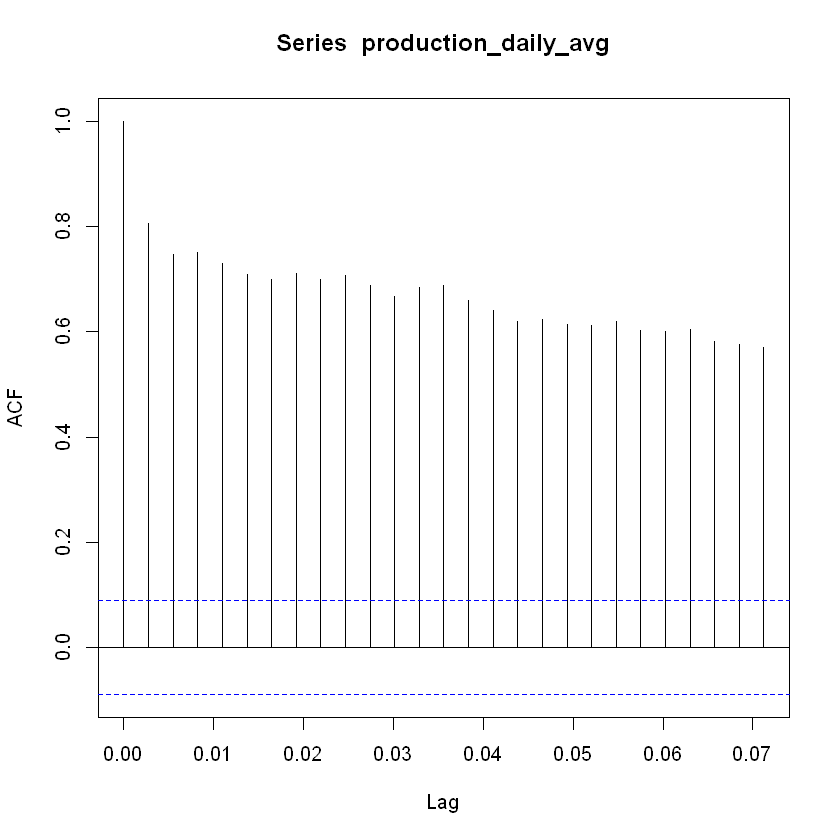

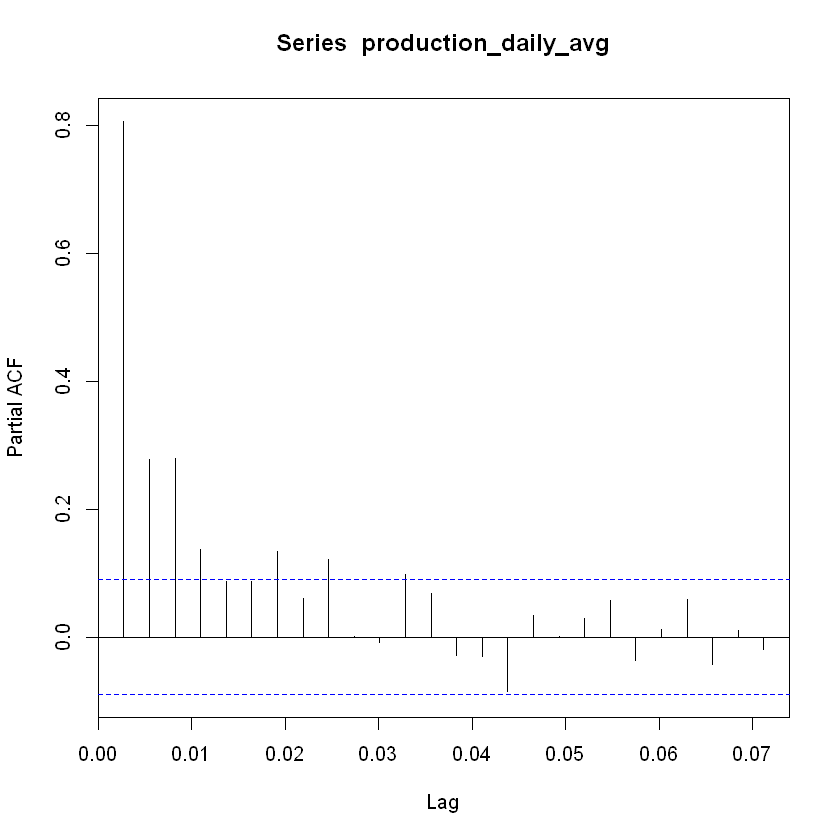

In [26]:
acf(production_daily_avg)
pacf(production_daily_avg)

Non stationary

### 2.3. Analysis of regressor variables

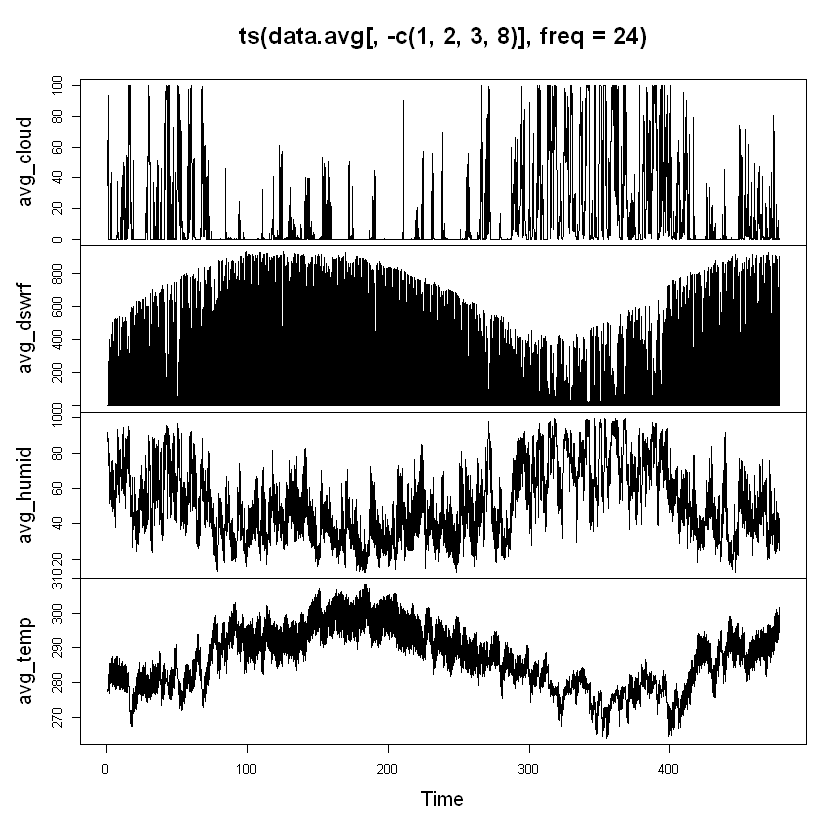

In [29]:
plot(ts(data.avg[,-c(1,2,3,8)],freq=24))

## 3. Approaches with using production as the response variable

### 3.1 Linear Regressions

In [17]:
data = prepare_data(add_features=FALSE)

#### 3.1.1. Linear Regression with just weather regressors

In [18]:
test.N = 24 * 15
train = data[1:(.N-test.N)]
test = data[(.N-test.N+1):.N]
fit = lm(production~.-date-hour,train)
summary(fit)


Call:
lm(formula = production ~ . - date - hour, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.445  -5.758  -1.552   3.899  38.892 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -9.094e+01  5.064e+00 -17.957  < 2e-16 ***
`36.25_33_CLOUD_LOW_LAYER`     6.059e-03  8.061e-03   0.752  0.45227    
`36.25_33_DSWRF`              -4.004e-05  4.029e-03  -0.010  0.99207    
`36.25_33_REL_HUMIDITY`       -1.778e-01  2.345e-02  -7.580 3.72e-14 ***
`36.25_33_TEMP`                3.466e-01  1.756e-01   1.974  0.04844 *  
`36.25_33.25_CLOUD_LOW_LAYER`  1.563e-02  8.414e-03   1.857  0.06327 .  
`36.25_33.25_DSWRF`            4.348e-03  4.090e-03   1.063  0.28781    
`36.25_33.25_REL_HUMIDITY`     1.389e-01  2.465e-02   5.634 1.81e-08 ***
`36.25_33.25_TEMP`             2.008e+00  1.745e-01  11.508  < 2e-16 ***
`36.5_33_CLOUD_LOW_LAYER`     -2.974e-02  7.033e-03  -4.228 2.37e-05 ***
`36.5_33_DSWRF`         

In [19]:
print(paste('train WMAPE:', wmape(train$production,fit$fitted.values)))
print(paste('test WMAPE:',wmape(test$production,predict(fit, test))))

[1] "train WMAPE: 0.66306321488786"
[1] "test WMAPE: 0.578318559011905"



	Breusch-Godfrey test for serial correlation of order up to 20

data:  Residuals
LM test = 8151.2, df = 20, p-value < 2.2e-16


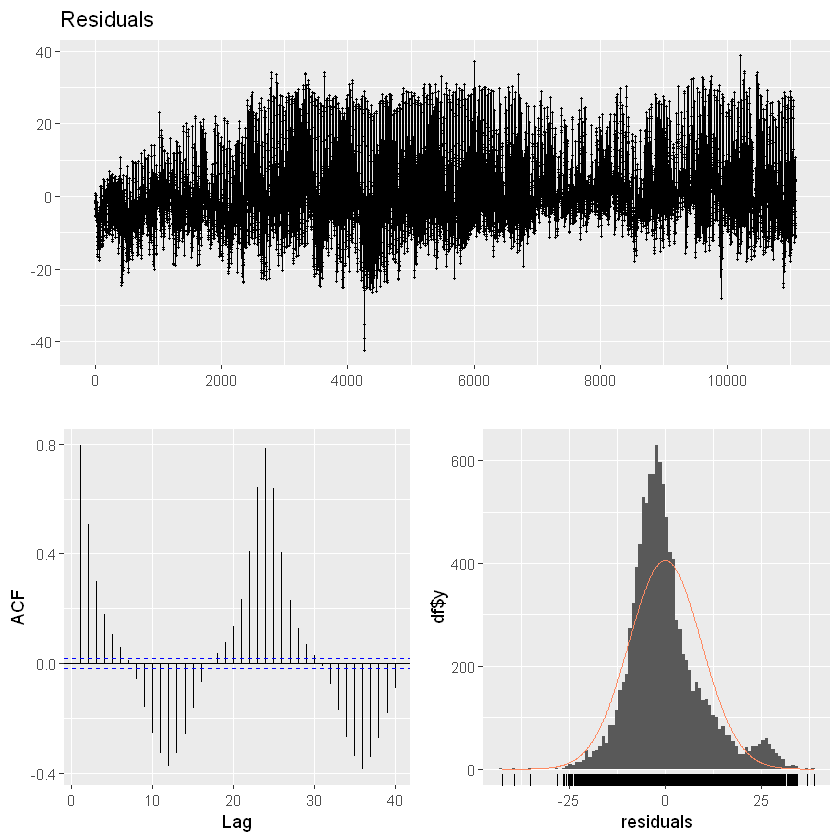

In [20]:
checkresiduals(fit)

#### 3.1.2. Linear Regression with weather regressors + seasonality (hour + month)

In [21]:
test.N = 24 * 15
data.tmp = data

data.tmp$hour = factor(data.tmp$hour)
data.tmp[,month:=as.factor(as.numeric(substr(data$date,6,7)))]

train = data.tmp[1:(.N-test.N)]
test = data.tmp[(.N-test.N+1):.N]

fit = lm(production~.-date,train)
summary(fit)


Call:
lm(formula = production ~ . - date, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.036  -3.439   0.492   3.326  22.541 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.875e+01  5.527e+00  -5.202 2.01e-07 ***
hour1                         -1.499e-02  4.018e-01  -0.037 0.970240    
hour2                         -3.645e-02  4.020e-01  -0.091 0.927753    
hour3                         -5.817e-02  4.024e-01  -0.145 0.885070    
hour4                         -7.519e-02  4.029e-01  -0.187 0.851963    
hour5                         -3.634e-02  4.034e-01  -0.090 0.928236    
hour6                          1.021e+00  4.036e-01   2.530 0.011434 *  
hour7                          8.307e+00  4.030e-01  20.612  < 2e-16 ***
hour8                          1.910e+01  4.043e-01  47.253  < 2e-16 ***
hour9                          2.386e+01  4.093e-01  58.289  < 2e-16 ***
hour10                         

In [22]:
print(paste('train WMAPE:', wmape(train$production,fit$fitted.values)))
print(paste('test WMAPE:',wmape(test$production,predict(fit, test))))

[1] "train WMAPE: 0.436510709266955"
[1] "test WMAPE: 0.26413425005615"



	Breusch-Godfrey test for serial correlation of order up to 54

data:  Residuals
LM test = 8279.1, df = 54, p-value < 2.2e-16


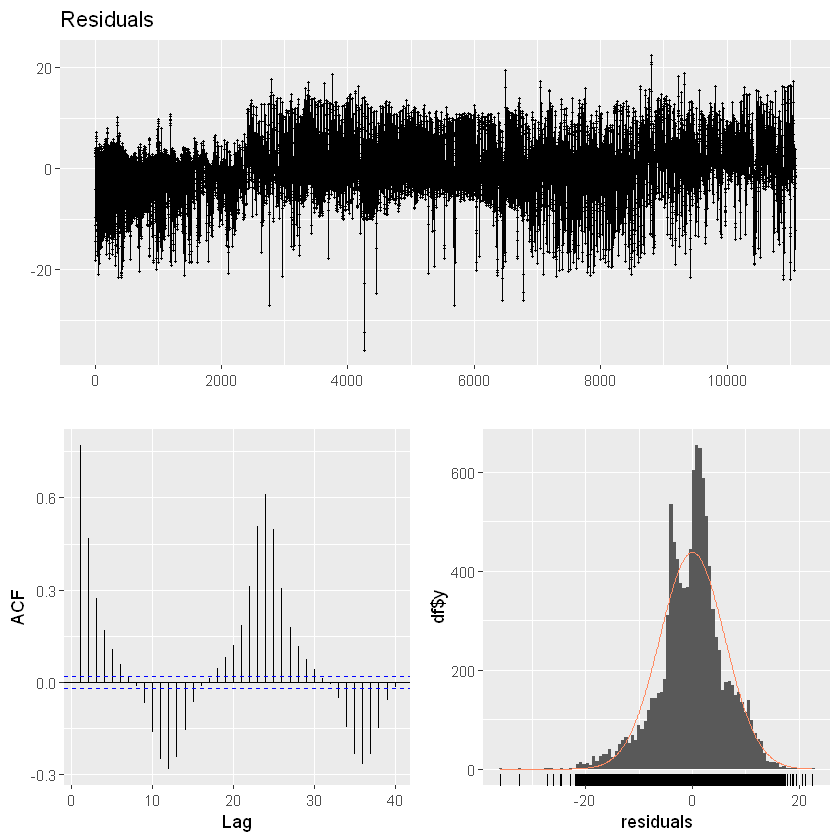

In [23]:
checkresiduals(fit)

#### 3.1.3. Linear Regression with weather regressors + seasonaliy (hour + month) + new features such as lag

In [24]:
test.N = 24 * 15
data.tmp = data

data.tmp = add_features(data.tmp, data.avg)
data.tmp$hour = factor(data.tmp$hour)
data.tmp = add_lag(data.tmp)

train = data.tmp[1:(.N-test.N)]
test = data.tmp[(.N-test.N+1):.N]

fit = lm(production~.-date,train)
summary(fit)


Call:
lm(formula = production ~ . - date, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.819  -1.682   0.081   1.996  27.872 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.395e+02  6.399e+01   3.743 0.000183 ***
hour1                         -2.600e-02  3.353e-01  -0.078 0.938177    
hour2                         -6.629e-02  3.354e-01  -0.198 0.843329    
hour3                         -1.058e-01  3.358e-01  -0.315 0.752757    
hour4                         -2.279e-01  3.364e-01  -0.678 0.498036    
hour5                         -2.264e-01  3.367e-01  -0.672 0.501471    
hour6                          3.460e-01  3.369e-01   1.027 0.304485    
hour7                          4.189e+00  3.422e-01  12.240  < 2e-16 ***
hour8                          9.873e+00  3.687e-01  26.781  < 2e-16 ***
hour9                          7.483e+00  4.618e-01  16.205  < 2e-16 ***
hour10                         

In [37]:
print(paste('train WMAPE:', wmape(train$production,fit$fitted.values)))
print(paste('test WMAPE:',wmape(test$production,predict(fit, test))))

[1] "train WMAPE: 0.306287603640692"
[1] "test WMAPE: 0.224963559576275"



	Breusch-Godfrey test for serial correlation of order up to 59

data:  Residuals
LM test = 6648.7, df = 59, p-value < 2.2e-16


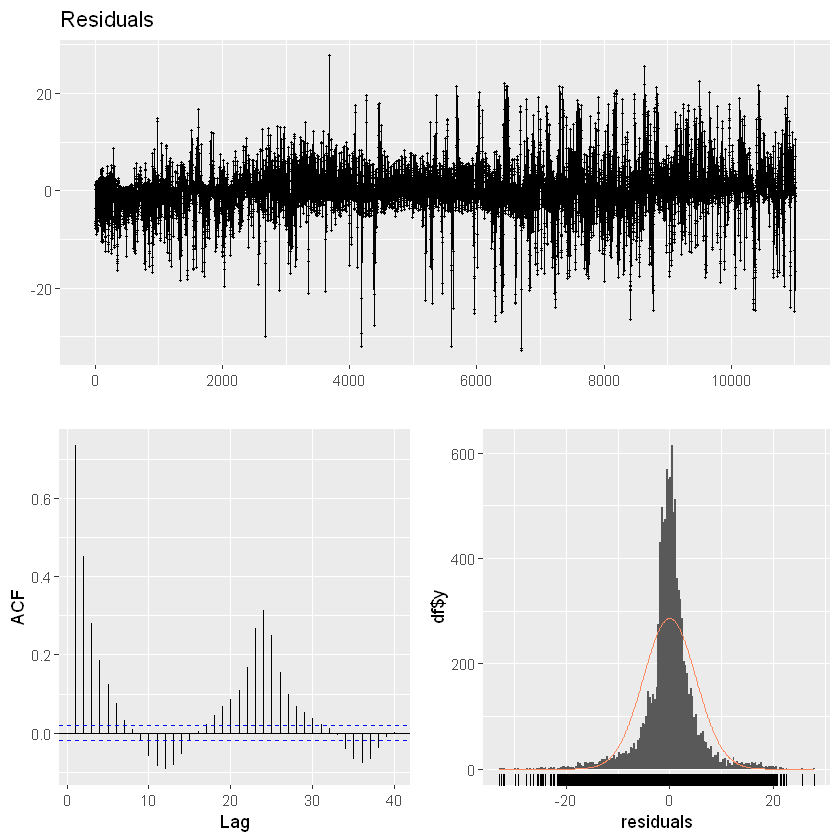

In [37]:
checkresiduals(fit)

### 3.2. Arima

In [39]:
data = prepare_data(add_features=FALSE)
data = add_features(data, data.avg)
data$hour = factor(data$hour)

In [40]:
production = ts(data$production, frequency = 24)

#### 3.2.1. Looking into production, how to stationarize

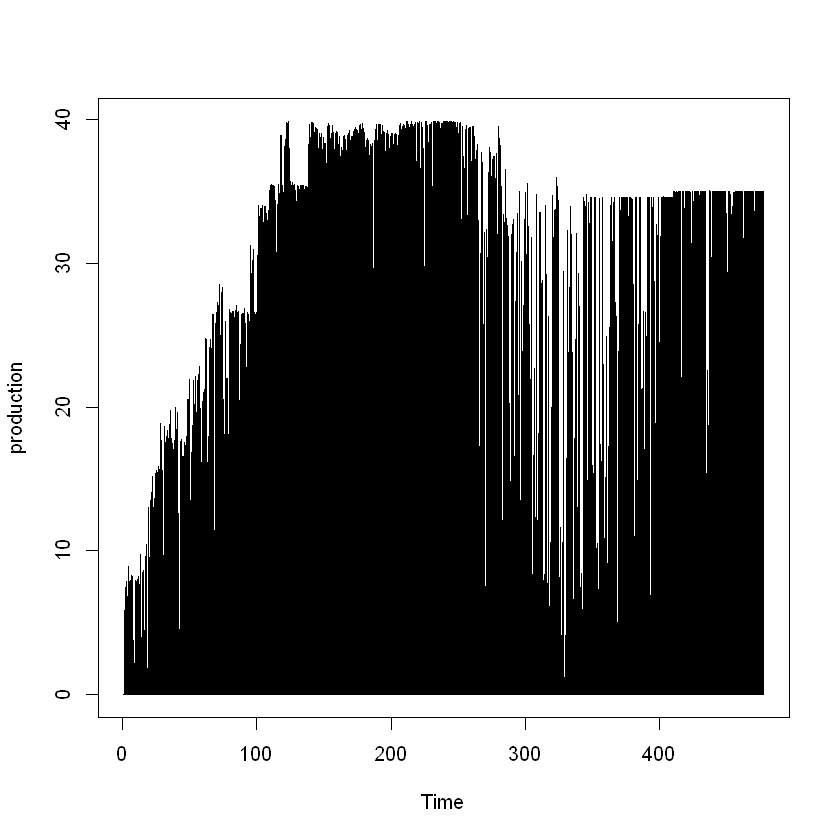

In [46]:
plot(production)

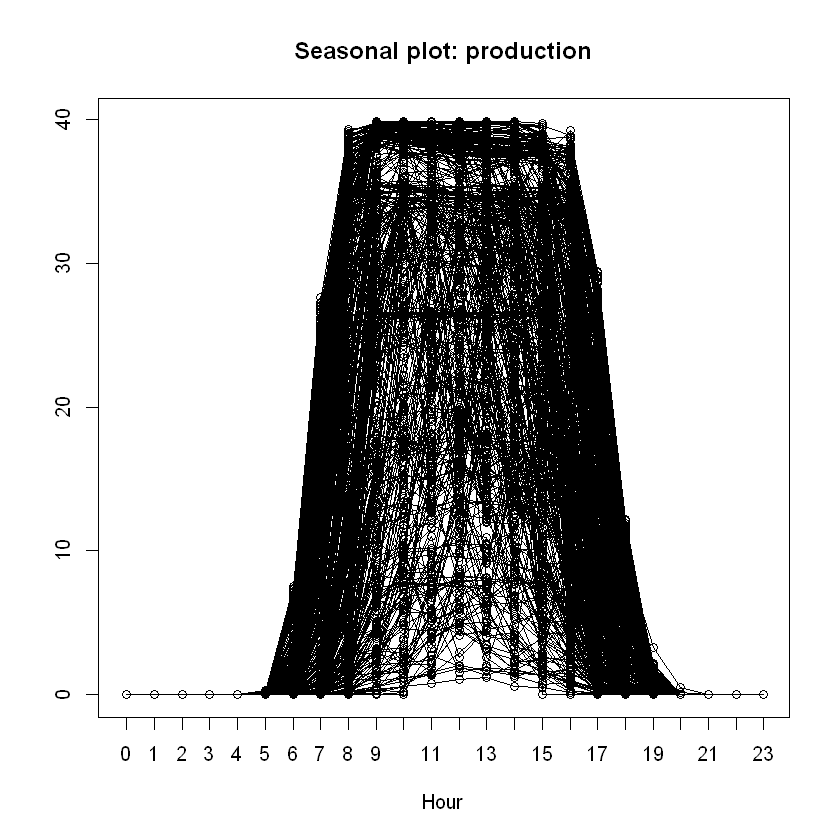

In [41]:
seasonplot(production)

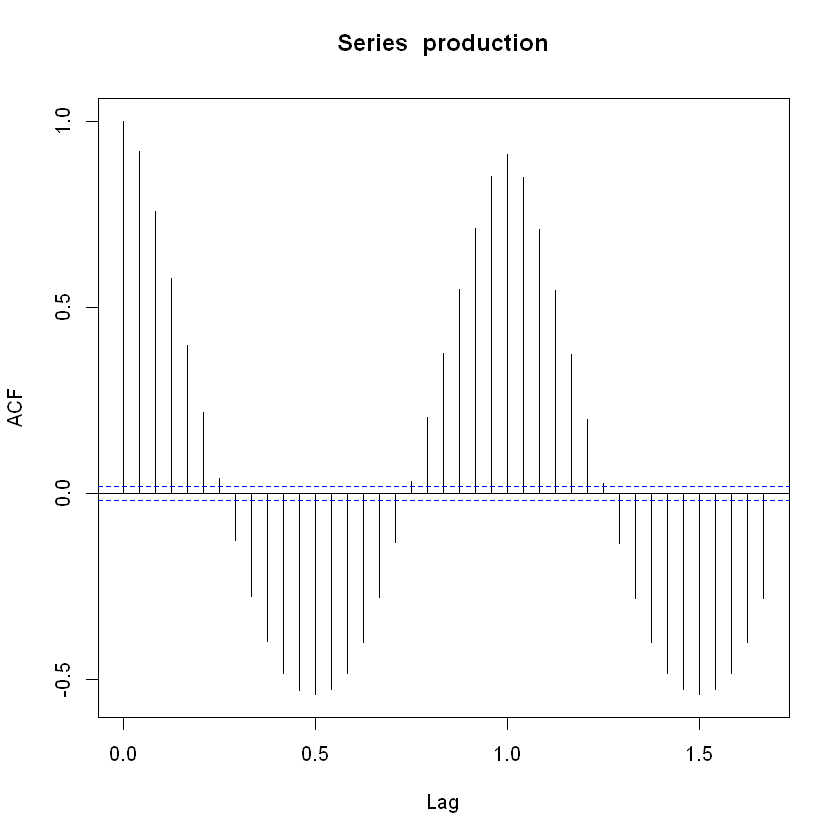

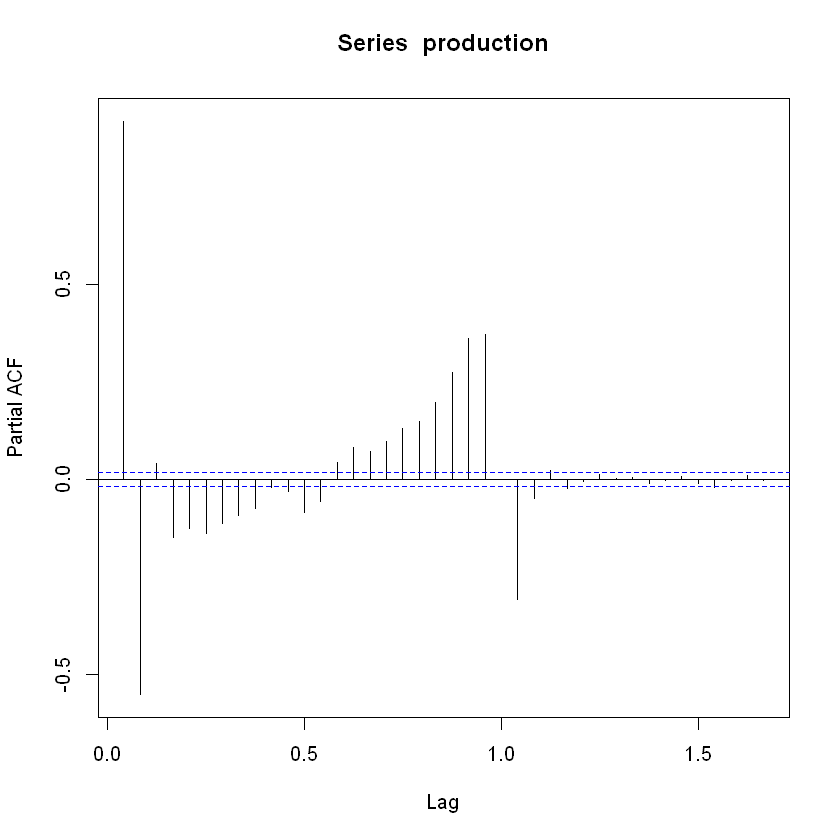

In [42]:
acf(production)
pacf(production)

In [43]:
#options(warn=-1) 
kpss.test(production)
#options(warn=1) 

Warning message in kpss.test(production):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  production
KPSS Level = 2.8187, Truncation lag parameter = 13, p-value = 0.01


Non-Stationary

In [44]:
production_diff = diff(production, lag = 72)

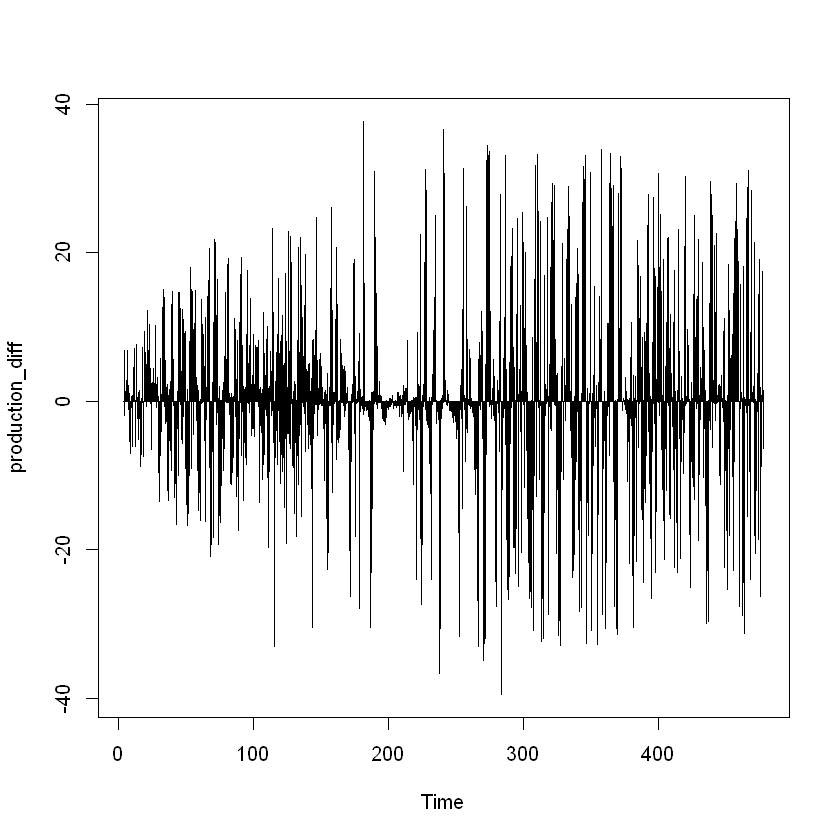

In [45]:
plot(production_diff)

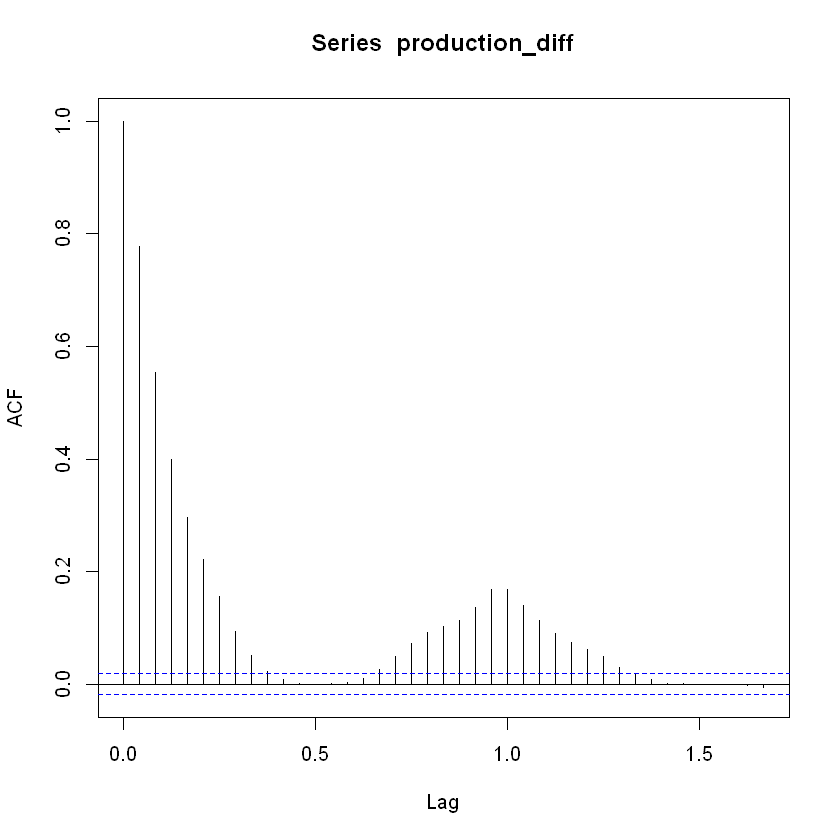

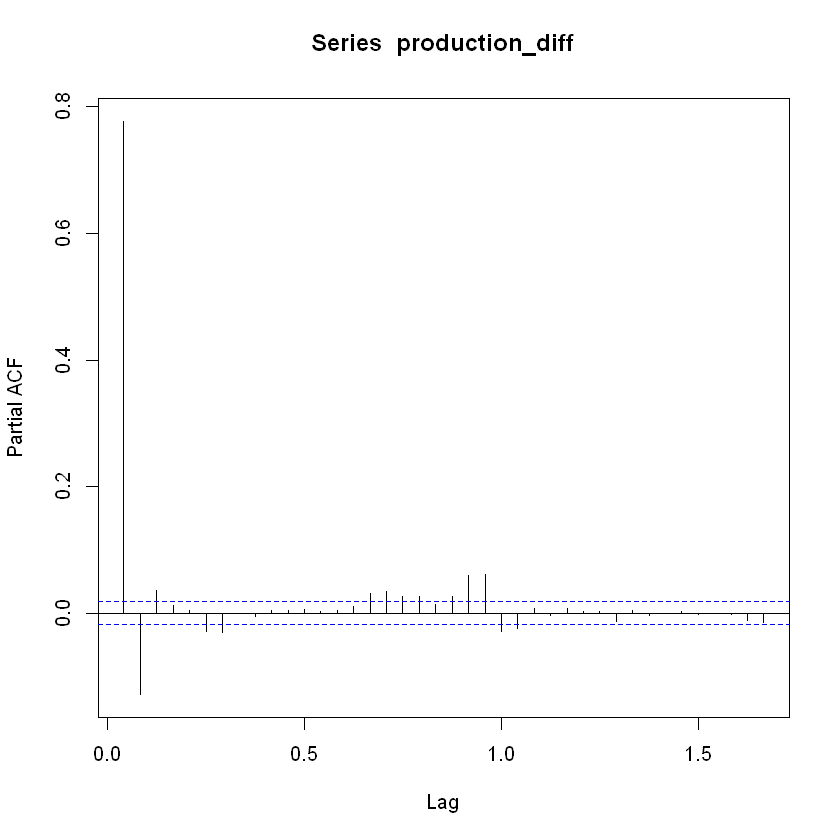

In [34]:
acf(production_diff)
pacf(production_diff)

In [47]:
#options(warn=-1) 
kpss.test(production_diff)
#options(warn=1) 

Warning message in kpss.test(production_diff):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  production_diff
KPSS Level = 0.079093, Truncation lag parameter = 13, p-value = 0.1


Stationary

#### 3.2.2 Trying arima models

In [59]:
test.N = 24 * 15
N = length(production)
train = production[1:(N-test.N)]
test = production[(N-test.N+1):N]

Choose period 72 since we have to predict 3 days ahead, normally the seasonality period is 24 since a day has 24 hours but 72 lag will capture that seasonality to some degree as well.

##### 3.2.2.1.

In [60]:
fit1 = arima(train, order=c(1,0,0), seasonal=list(order = c(0,1,0), period = 72))

In [61]:
summary(fit1)


Call:
arima(x = train, order = c(1, 0, 0), seasonal = list(order = c(0, 1, 0), period = 72))

Coefficients:
         ar1
      0.7828
s.e.  0.0059

sigma^2 estimated as 16.08:  log likelihood = -30930.12,  aic = 61864.24

Training set error measures:
                     ME     RMSE      MAE MPE MAPE      MASE      ACF1
Training set 0.01699801 3.996849 1.783461 NaN  Inf 0.6438037 0.1048959


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(0,1,0)[72]
Q* = 246.57, df = 9, p-value < 2.2e-16

Model df: 1.   Total lags used: 10



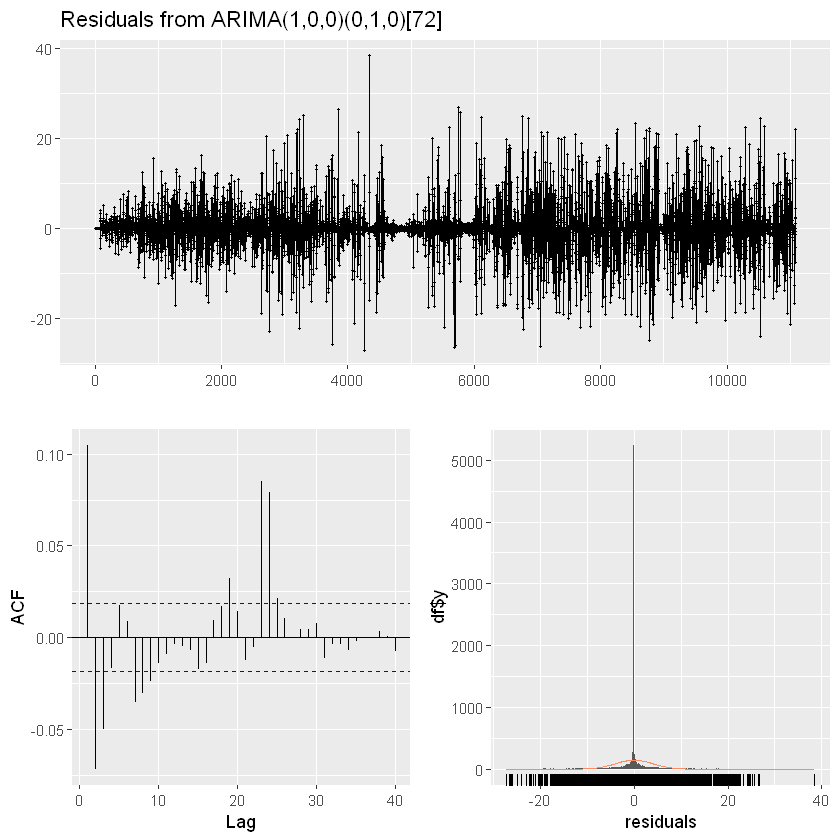

In [62]:
checkresiduals(fit1)

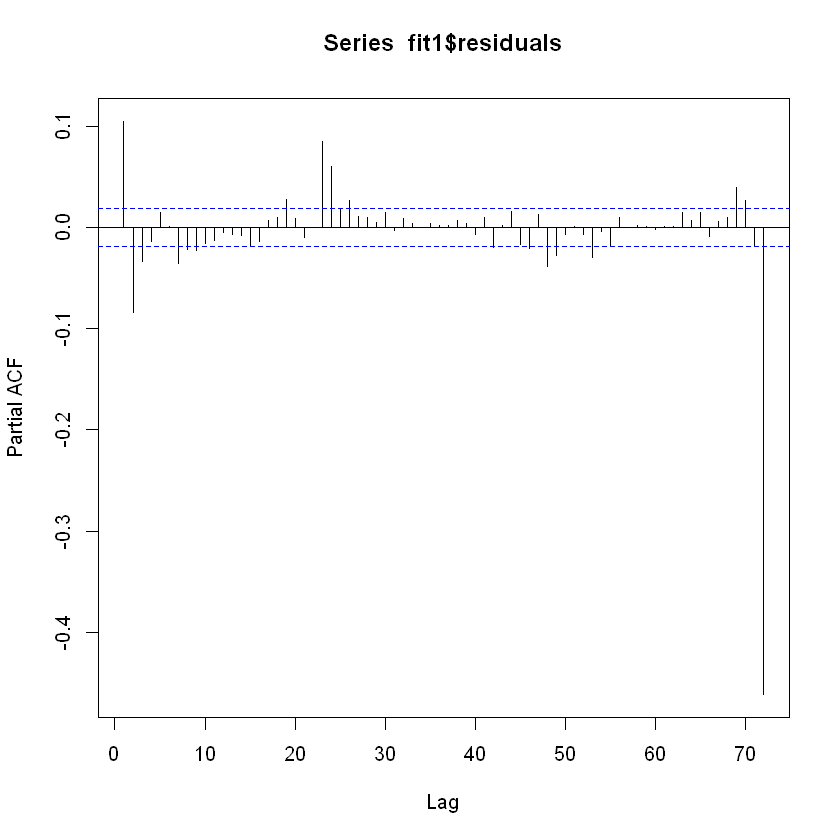

In [65]:
pacf(fit1$residuals, lag.max=72)

In [66]:
print(paste('train WMAPE:', wmape(train, fitted(fit1))))
print(paste('test WMAPE:', wmape(test, forecast(fit1, h=test.N)$mean)))

[1] "train WMAPE: 0.16990133575405"
[1] "test WMAPE: 0.236141508955498"


##### 3.2.2.2.

Try adding seasonal ar 1

In [67]:
fit2 = arima(train, order=c(1,0,0), seasonal=list(order = c(1,1,0), period = 72))

In [68]:
summary(fit2)


Call:
arima(x = train, order = c(1, 0, 0), seasonal = list(order = c(1, 1, 0), period = 72))

Coefficients:
         ar1     sar1
      0.7921  -0.4688
s.e.  0.0058   0.0084

sigma^2 estimated as 12.54:  log likelihood = -29567.6,  aic = 59141.2

Training set error measures:
                     ME     RMSE      MAE MPE MAPE      MASE      ACF1
Training set 0.02386221 3.528976 1.653441 NaN  Inf 0.5968682 0.1187119


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,1,0)[72]
Q* = 305.13, df = 8, p-value < 2.2e-16

Model df: 2.   Total lags used: 10



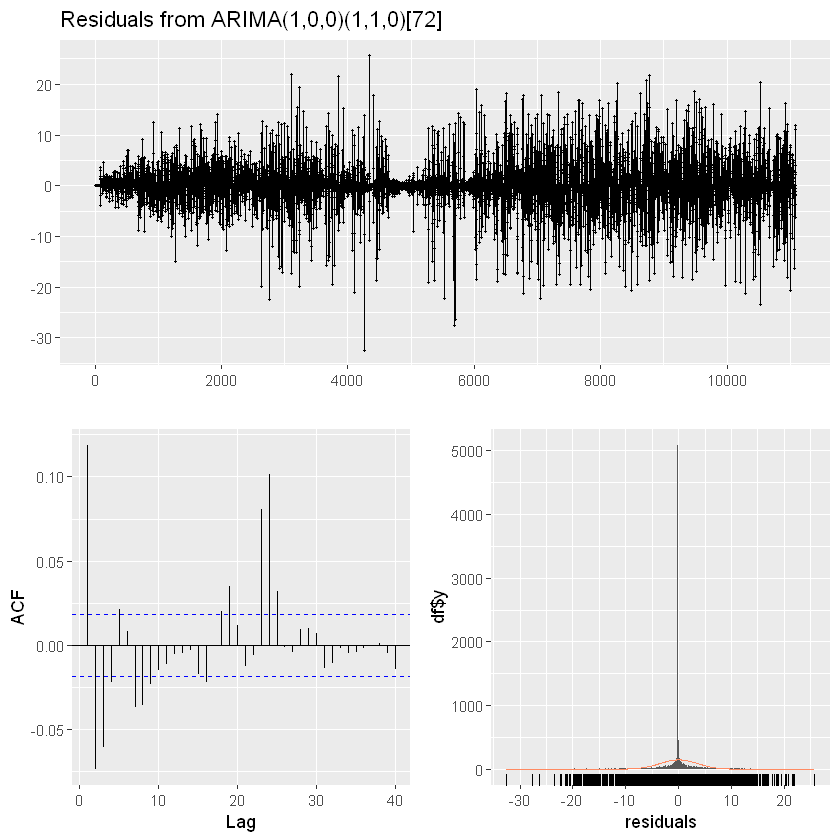

In [69]:
checkresiduals(fit2)

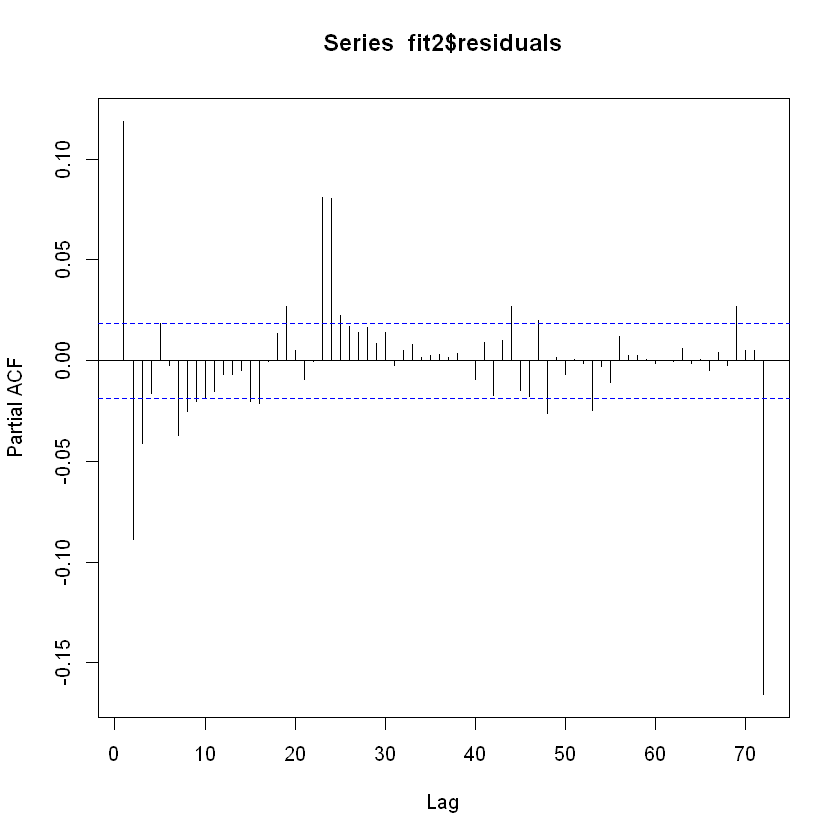

In [70]:
pacf(fit2$residuals, lag.max=72)

In [71]:
print(paste('train WMAPE:', wmape(train, fitted(fit2))))
print(paste('test WMAPE:', wmape(test, forecast(fit2, h=test.N)$mean)))

[1] "train WMAPE: 0.157514956959684"
[1] "test WMAPE: 0.216382850722771"


##### 3.2.2.3.

Add one more ar

In [78]:
fit3 = arima(train, order=c(2,0,0), seasonal=list(order = c(1,1,0), period = 72))

In [79]:
summary(fit3)


Call:
arima(x = train, order = c(2, 0, 0), seasonal = list(order = c(1, 1, 0), period = 72))

Coefficients:
         ar1      ar2     sar1
      0.9110  -0.1499  -0.4727
s.e.  0.0094   0.0094   0.0084

sigma^2 estimated as 12.25:  log likelihood = -29442.43,  aic = 58892.86

Training set error measures:
                     ME     RMSE      MAE MPE MAPE      MASE        ACF1
Training set 0.02749758 3.489043 1.635536 NaN  Inf 0.5904048 0.006160518


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0)(1,1,0)[72]
Q* = 52.203, df = 7, p-value = 5.325e-09

Model df: 3.   Total lags used: 10



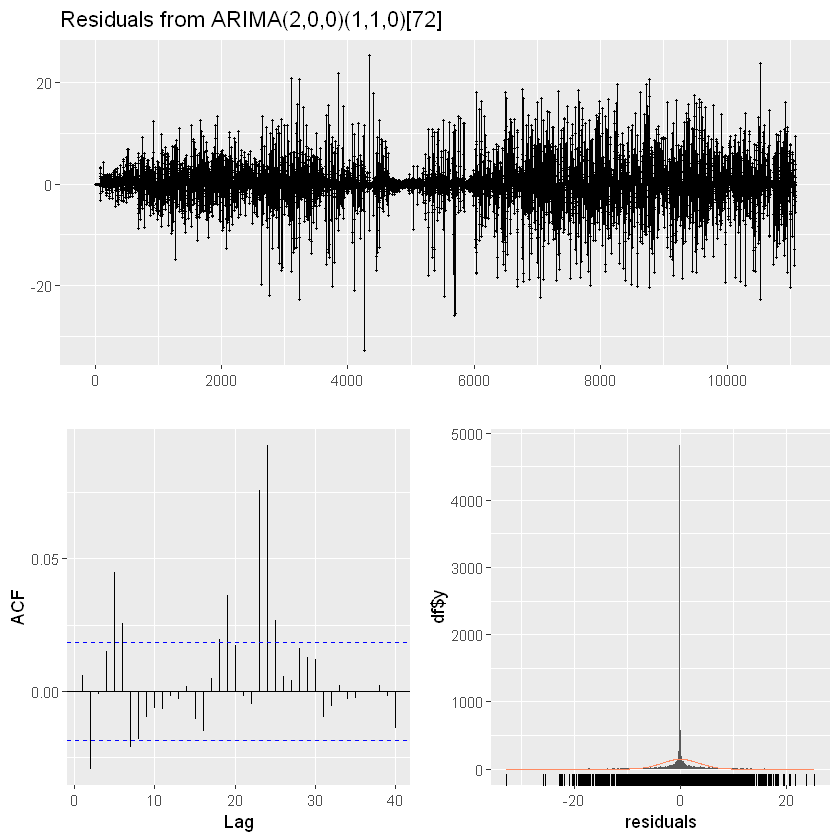

In [80]:
checkresiduals(fit3)

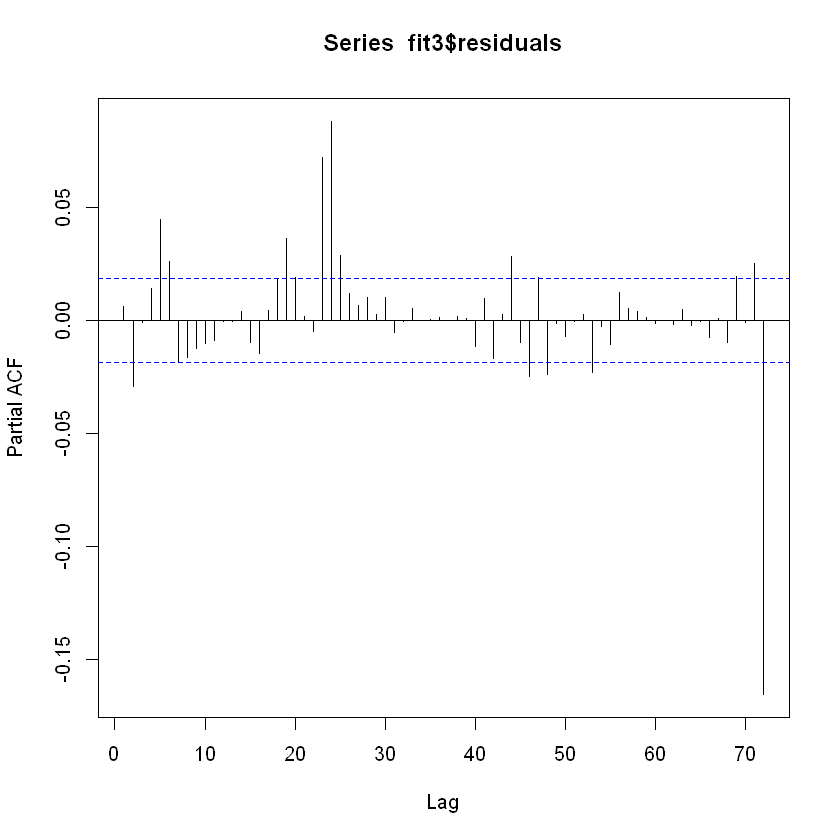

In [83]:
pacf(fit3$residuals, lag.max=72)

In [84]:
print(paste('train WMAPE:', wmape(train, fitted(fit3))))
print(paste('test WMAPE:', wmape(test, forecast(fit3, h=test.N)$mean)))

[1] "train WMAPE: 0.155809246739833"
[1] "test WMAPE: 0.216272792969796"


##### 3.2.2.4.

Try adding MA

In [85]:
fit4 = arima(train, order=c(2,0,1), seasonal=list(order = c(1,1,0), period = 72))

In [86]:
summary(fit4)


Call:
arima(x = train, order = c(2, 0, 1), seasonal = list(order = c(1, 1, 0), period = 72))

Coefficients:
         ar1     ar2     ma1     sar1
      0.7045  0.0133  0.2124  -0.4727
s.e.  0.0348  0.0283  0.0342   0.0083

sigma^2 estimated as 12.24:  log likelihood = -29434.95,  aic = 58879.89

Training set error measures:
                     ME     RMSE      MAE MPE MAPE      MASE         ACF1
Training set 0.02678562 3.486673 1.634511 NaN  Inf 0.5900349 -0.000185743


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1)(1,1,0)[72]
Q* = 36.77, df = 6, p-value = 1.952e-06

Model df: 4.   Total lags used: 10



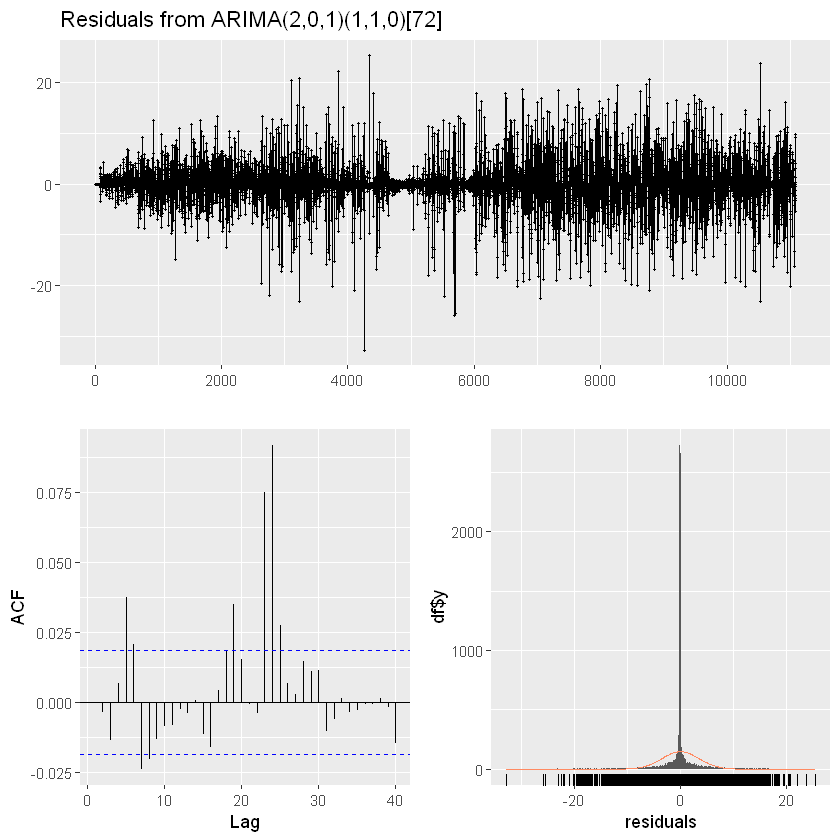

In [87]:
checkresiduals(fit4)

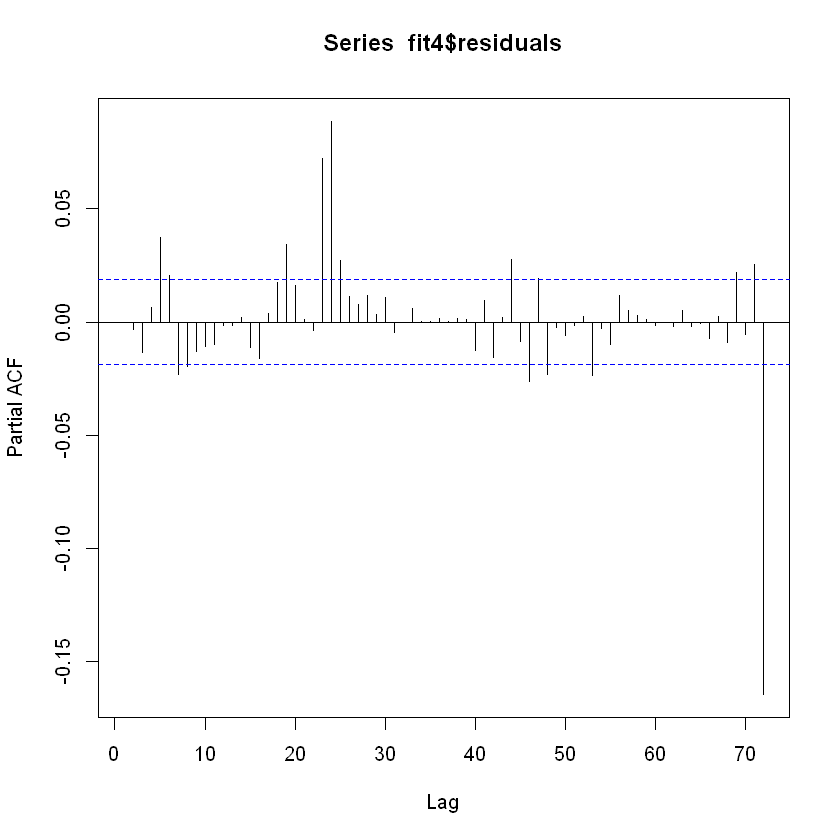

In [88]:
pacf(fit4$residuals, lag.max=72)

In [89]:
print(paste('train WMAPE:', wmape(train, fitted(fit4))))
print(paste('test WMAPE:', wmape(test, forecast(fit4, h=test.N)$mean)))

[1] "train WMAPE: 0.155711625800991"
[1] "test WMAPE: 0.216277624132058"


##### 3.2.2.5.

Remove MA 1 and add seasonal MA 1

In [90]:
fit5 = arima(train, order=c(2,0,0), seasonal=list(order = c(1,1,1), period = 72))

In [91]:
summary(fit5)


Call:
arima(x = train, order = c(2, 0, 0), seasonal = list(order = c(1, 1, 1), period = 72))

Coefficients:
         ar1      ar2     sar1     sma1
      0.9264  -0.1582  -0.0231  -0.7771
s.e.  0.0095   0.0094   0.0115   0.0067

sigma^2 estimated as 9.621:  log likelihood = -28135.93,  aic = 56281.87

Training set error measures:
                     ME     RMSE      MAE MPE MAPE     MASE        ACF1
Training set 0.07707041 3.091661 1.511119 NaN  Inf 0.545492 0.008133973


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0)(1,1,1)[72]
Q* = 61.753, df = 6, p-value = 1.981e-11

Model df: 4.   Total lags used: 10



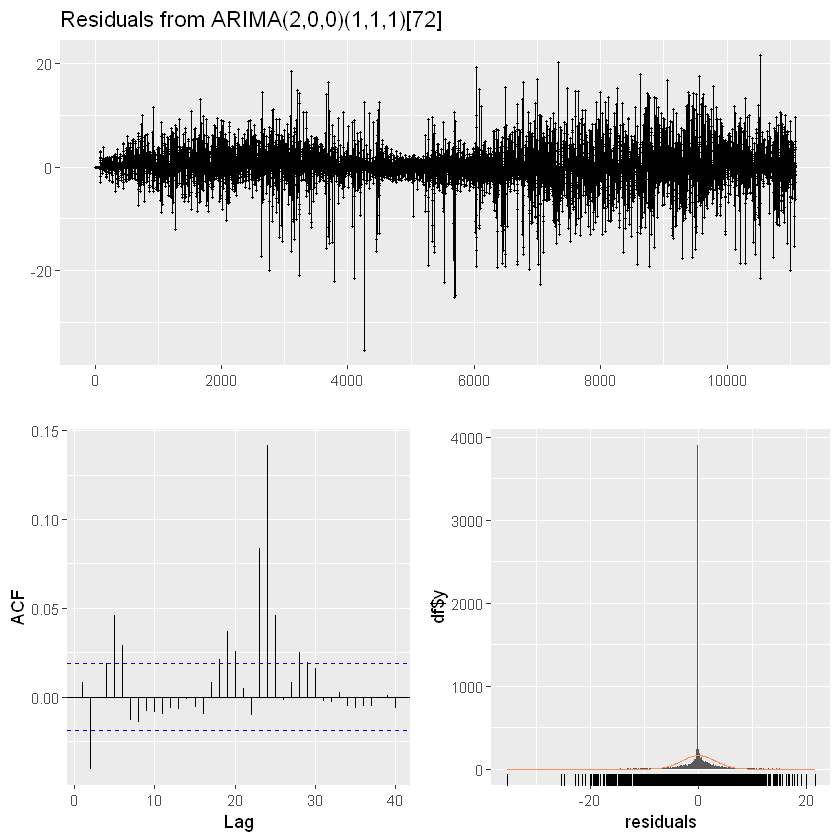

In [92]:
checkresiduals(fit5)

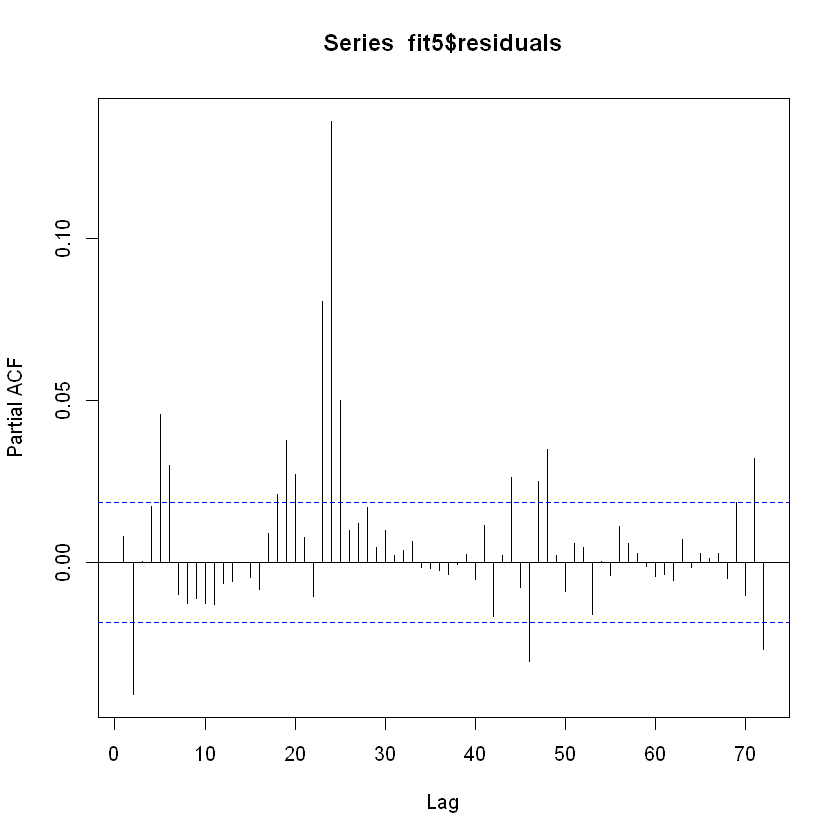

In [93]:
pacf(fit5$residuals, lag.max=72)

In [94]:
print(paste('train WMAPE:', wmape(train, fitted(fit5))))
print(paste('test WMAPE:', wmape(test, forecast(fit5, h=test.N)$mean)))

[1] "train WMAPE: 0.143956657314241"
[1] "test WMAPE: 0.213353249893948"


## 4. Predicting Utilization Hourly 

### 4.1. Prepare data

Add all predetermined weather features.

In [107]:
data = prepare_data()

In [108]:
head(data)

date,hour,36.25_33_CLOUD_LOW_LAYER,36.25_33_DSWRF,36.25_33_REL_HUMIDITY,36.25_33_TEMP,36.25_33.25_CLOUD_LOW_LAYER,36.25_33.25_DSWRF,36.25_33.25_REL_HUMIDITY,36.25_33.25_TEMP,...,36.5_33.25_DSWRF,36.5_33.25_REL_HUMIDITY,36.5_33.25_TEMP,production,cloud_sqr,clear_sky,dswrf_sqr,temp_sqr,month,lag72
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2021-02-04,0,0,0,65.3,281.498,0,0,68.3,281.908,...,0,82.2,279.808,0,0,0,0,78485.70,2,0
2021-02-04,1,0,0,65.7,281.377,0,0,68.8,281.927,...,0,83.0,279.427,0,0,0,0,78368.92,2,0
2021-02-04,2,0,0,67.0,281.177,0,0,69.5,281.957,...,0,83.3,279.157,0,0,0,0,78262.58,2,0
2021-02-04,3,0,0,67.2,280.949,0,0,69.9,281.999,...,0,80.9,279.289,0,0,0,0,78218.94,2,0
2021-02-04,4,0,0,62.8,280.903,0,0,65.0,282.123,...,0,71.5,279.703,0,0,0,0,78284.12,2,0
2021-02-04,5,0,0,61.7,280.982,0,0,63.7,282.252,...,0,68.5,279.792,0,0,0,0,78307.35,2,0


Divide data hourly, add daily capacities, calculate utilization

In [109]:
hourly_data = divide_hourly(data)
capacity.max = rollingcapacity(hourly_data)
head(hourly_data[[12]])

date,hour,36.25_33_CLOUD_LOW_LAYER,36.25_33_DSWRF,36.25_33_REL_HUMIDITY,36.25_33_TEMP,36.25_33.25_CLOUD_LOW_LAYER,36.25_33.25_DSWRF,36.25_33.25_REL_HUMIDITY,36.25_33.25_TEMP,...,36.5_33.25_TEMP,production,cloud_sqr,clear_sky,dswrf_sqr,temp_sqr,month,lag72,capacity,utilization
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
2021-02-04,11,0,330,47.9,286.389,0,320,46.8,287.399,...,284.669,5.70,0,1,112225.00,81188.81,2,2.73,8.943600,0.6373273
2021-02-05,11,0,360,46.0,286.107,0,360,46.5,287.417,...,285.467,7.65,0,1,127806.25,81405.79,2,7.11,9.216000,0.8300781
2021-02-06,11,0,360,45.8,285.454,0,360,47.9,286.144,...,285.314,7.59,0,1,133225.00,81277.16,2,1.38,9.541333,0.7954863
2021-02-07,11,4,370,64.5,285.084,4,360,74.3,285.614,...,285.954,6.75,8,1,135056.25,81452.59,2,5.70,9.928000,0.6798952
2021-02-08,11,0,240,57.2,283.999,0,230,68.4,284.319,...,283.359,1.54,0,1,45156.25,80558.90,2,7.65,10.314667,0.1493020
2021-02-09,11,0,380,60.8,284.867,0,370,60.9,285.867,...,285.317,7.49,0,1,140625.00,81234.69,2,7.59,10.701333,0.6999128


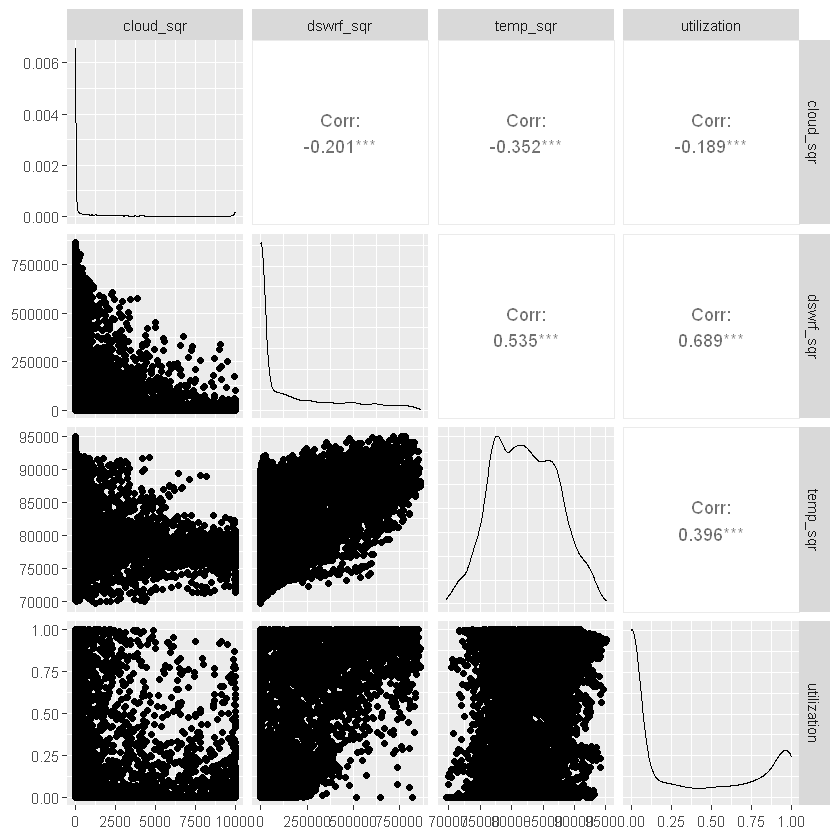

In [110]:
ggpairs(aggregate_hourly(hourly_data)[,-c(1:18,19,21,24,25,26)])

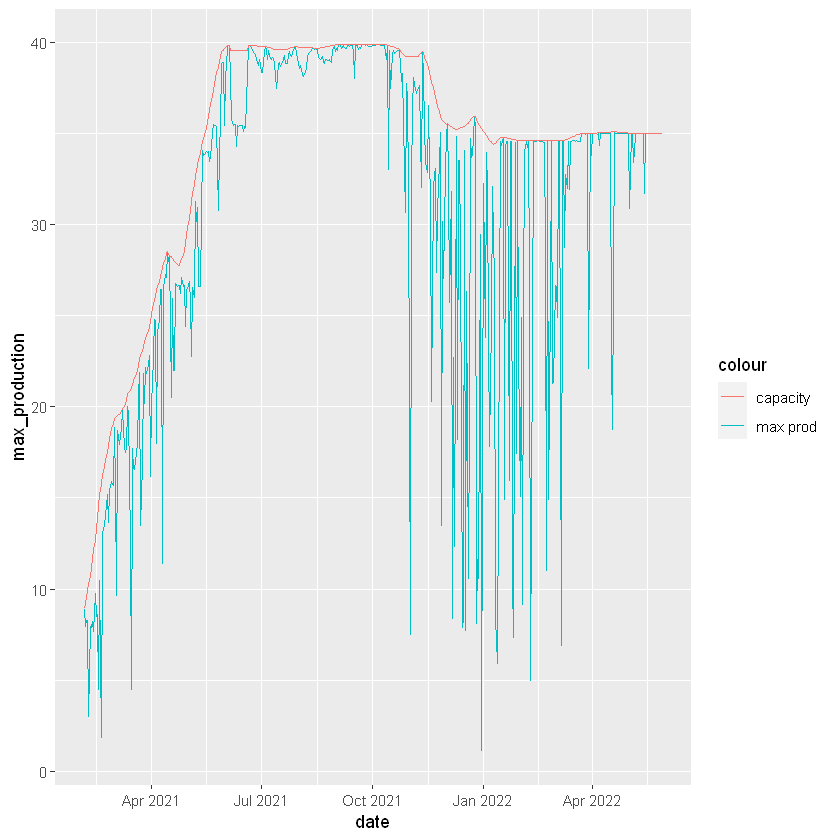

In [111]:
daily.data = data[,list(max_production=max(production)), list(date)]
daily.data[, capacity:=capacity.max]
ggplot(daily.data, aes(x=date)) +
        geom_line(aes(y = max_production, color='max prod')) +
        geom_line(aes(y = capacity, color='capacity'))

In [112]:
data.prc = aggregate_hourly(hourly_data)

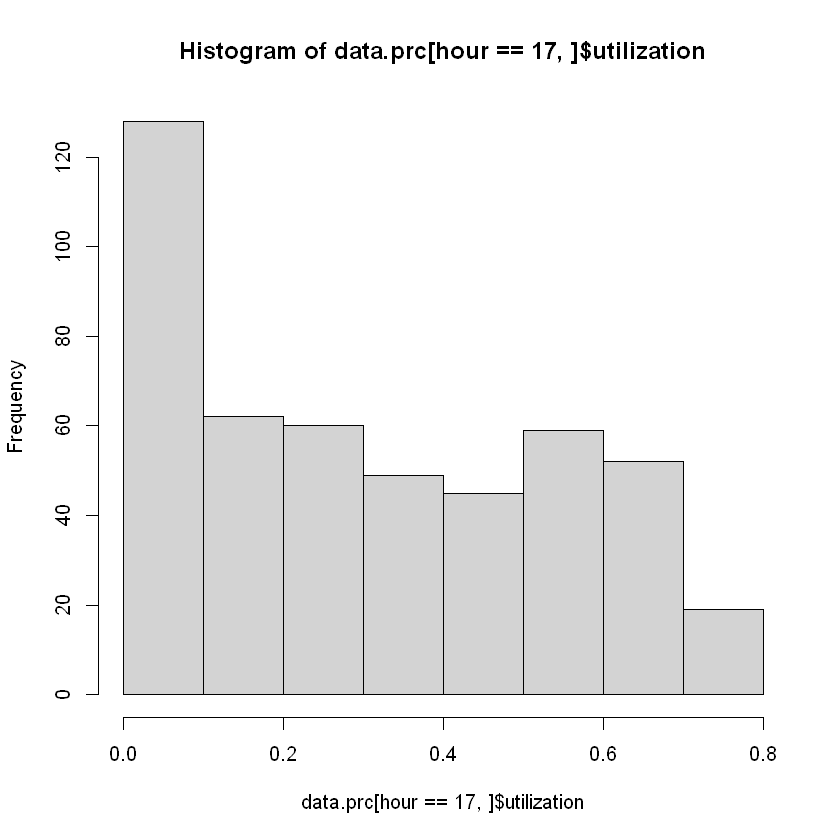

In [113]:
hist(data.prc[hour==17,]$utilization)

### 4.2. Train all data and remove outliers, remove winter data

In [114]:
output = fit_models.lm(hourly_data)

[1] "train WMAPE: 0.151151536203116"
[1] "test WMAPE: 0.194208060010904"


In [115]:
output = fit_models.lm.trainall(hourly_data)

[1] "train WMAPE: 0.152144446267065"


In [116]:
data = remove_outliers(data, output$result, k=5)

In [117]:
data = cut_data(data, months = c('11','12','01','02'))
#data = data[substr(date,1,7)!='2021-03']

In [118]:
hourly_data = divide_hourly(data)
capacity.max = rollingcapacity(hourly_data)

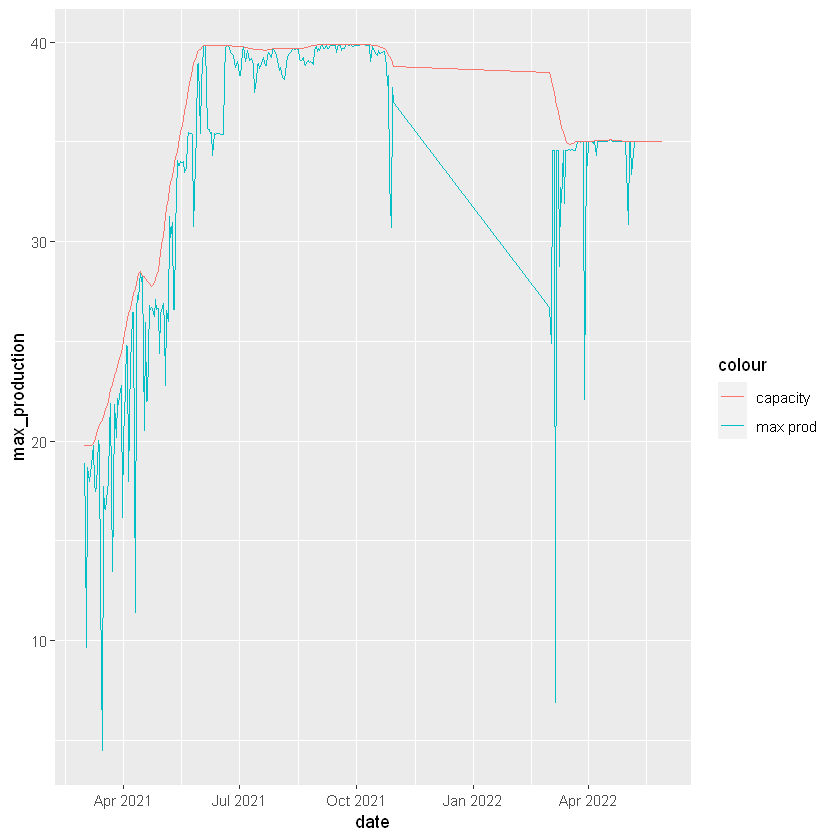

In [119]:
daily.data = data[,list(max_production=max(production)), list(date)]
daily.data[, capacity:=capacity.max]
ggplot(daily.data, aes(x=date)) +
        geom_line(aes(y = max_production, color='max prod')) +
        geom_line(aes(y = capacity, color='capacity'))

In [125]:
output = fit_models.lm(hourly_data)

[1] "train WMAPE: 0.0992710258572334"
[1] "test WMAPE: 0.180071990417073"


In [126]:
output = fit_models.lm.trainall(hourly_data)

[1] "train WMAPE: 0.102375314874035"


### 4.3. Predictions

In [127]:
summary(output$models[[14]])


Call:
lm(formula = formula, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52381 -0.02916  0.01592  0.05960  0.32148 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    8.516e+00  1.264e+01   0.674 0.501010    
`36.25_33_CLOUD_LOW_LAYER`    -9.028e-04  1.169e-03  -0.772 0.440610    
`36.25_33_DSWRF`               2.382e-04  3.942e-04   0.604 0.546153    
`36.25_33_REL_HUMIDITY`        4.854e-03  2.614e-03   1.857 0.064441 .  
`36.25_33_TEMP`                9.614e-03  2.850e-02   0.337 0.736122    
`36.25_33.25_CLOUD_LOW_LAYER`  6.782e-04  1.353e-03   0.501 0.616607    
`36.25_33.25_DSWRF`            1.243e-04  3.588e-04   0.347 0.729193    
`36.25_33.25_REL_HUMIDITY`    -4.402e-03  2.812e-03  -1.566 0.118598    
`36.25_33.25_TEMP`            -2.757e-02  2.474e-02  -1.115 0.265995    
`36.5_33_CLOUD_LOW_LAYER`     -2.611e-05  1.030e-03  -0.025 0.979793    
`36.5_33_DSWRF`                1.01

[1] "WMAPE: 0.15622745116521"


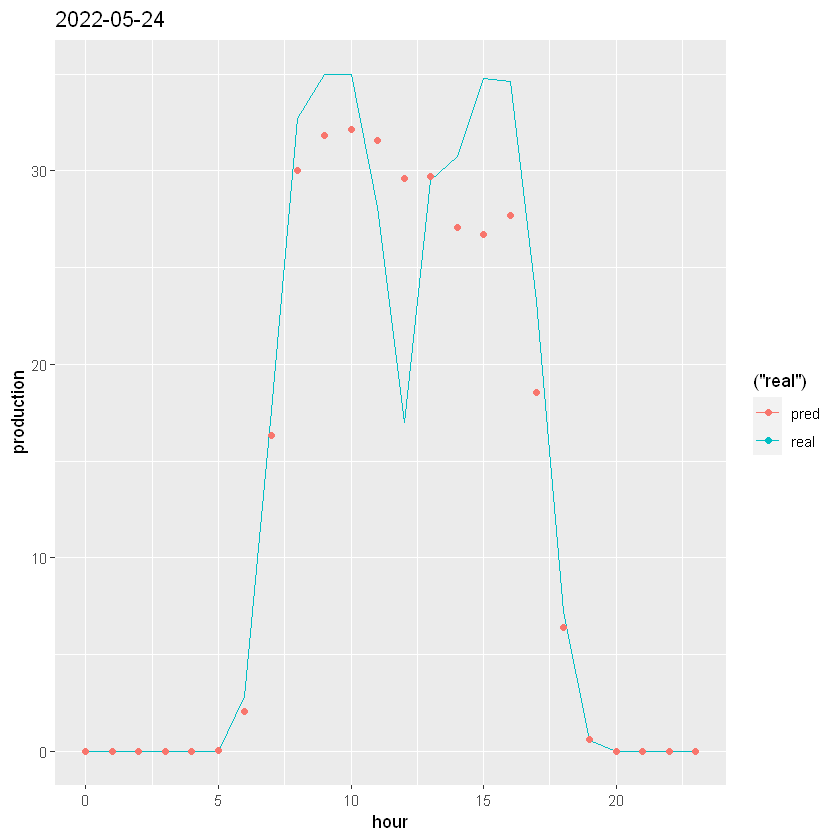

In [137]:
data.date = output$result[date=='2022-05-04',]

ggplot(data.date, aes(x=hour, group = 1)) +
    ggtitle('2022-05-24') +
    geom_line(aes(y=production, color=('real'))) +
    geom_point(aes(y=prediction, color=('pred')))

print(paste('WMAPE:',sum(abs(data.date$production-data.date$prediction))/sum(data.date$production)))

In [101]:
lag_production = data[date=='2022-05-29',]$production
pred.X = prepare_data.prediction(lag_production, date_='2022-05-31')

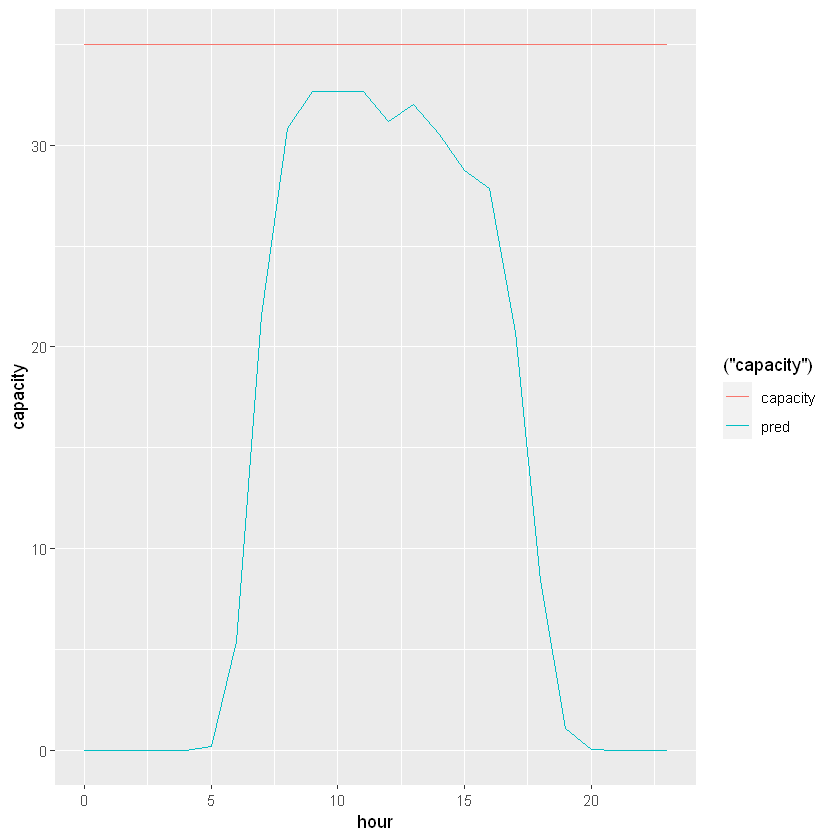

In [102]:
pred.X = add_capacity(pred.X, capacity.max[length(capacity.max)])

prediction = numeric(24)
for(i in 1:24)
{
    if(i<=5 | i>=22)
        prediction[i] = 0
    else
    {
        options(warn=-1)     
        prediction[i] = pmin(pmax(predict(output$models[[i]], pred.X[i]),0),1)*pred.X[i]$capacity
        options(warn=1) 
    }
}
pred.X[,prediction := prediction]

ggplot(pred.X, aes(x=hour, group = 1)) +
    geom_line(aes(y=capacity, color=('capacity'))) +
    geom_line(aes(y=prediction, color=('pred')))

In [103]:
summary(output$result[hour>=8&hour<=12&substr(date,3,7)=='22-05',]$production)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.04   34.99   35.00   33.82   35.00   35.00 

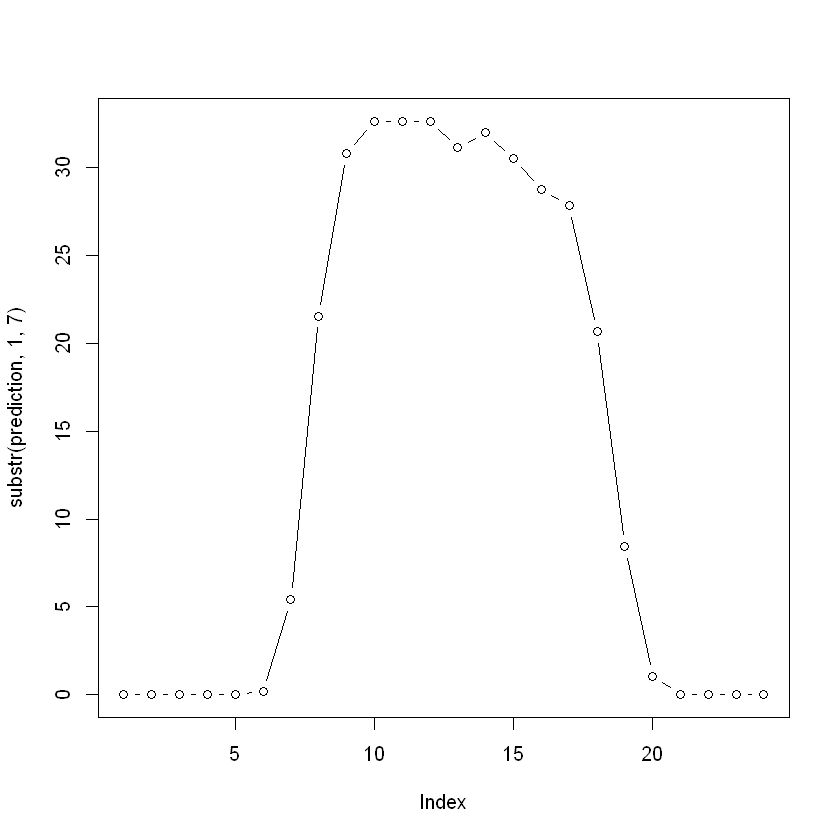

In [104]:
plot(substr(prediction,1,7),type='b')    

In [105]:
threshold = summary(output$result[production==35,]$prediction)[2]
#prediction[prediction>threshold] = 35
prediction[9:13] = 35

In [106]:
p = substr(prediction,1,7)
print(paste(p, collapse =','))

[1] "0,0,0,0,0,0.16824,5.40271,21.5649,35,35,35,35,35,31.9966,30.5278,28.7578,27.8684,20.6929,8.42558,1.04977,0.00866,0,0,0"


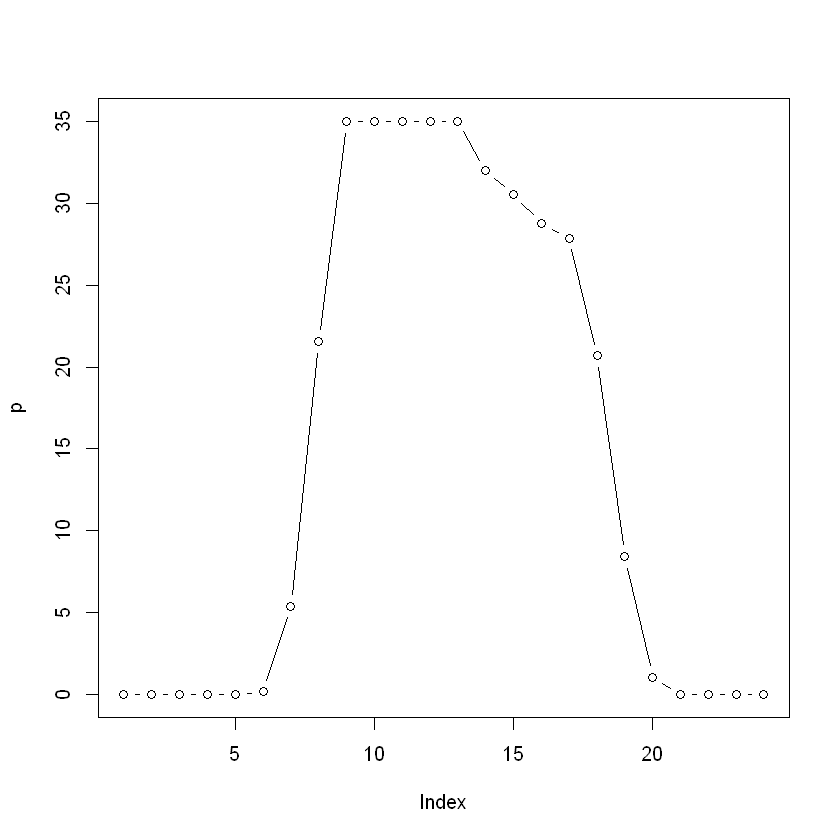

In [107]:
plot(p,type='b')    

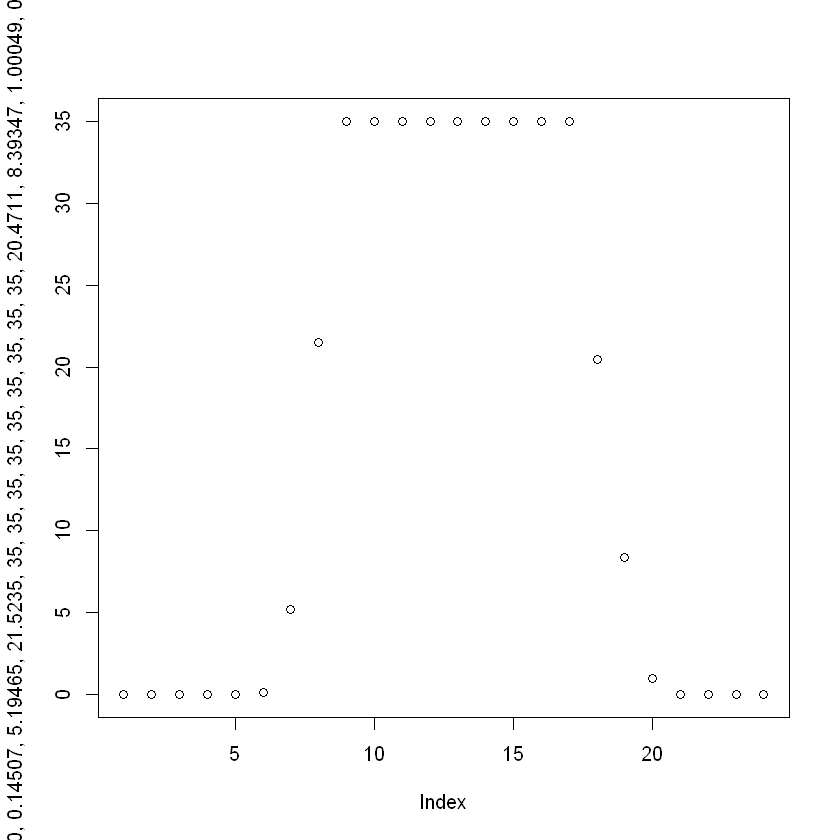

In [108]:
plot(c(0,0,0,0,0,0.14507,5.19465,21.5235,35,35,35,35,35,35,35,35,35,20.4711,8.39347,1.00049,0.00844,0,0,0))

## 5. Functions

### 5.0. Libraries

In [15]:
library(data.table)
library(ggplot2)
library(GGally)
library(Hmisc)
library(MASS)
library(forecast)
library(zoo)
library(caTools)
library(corrplot)
library(tseries)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


corrplot 0.92 loaded



### 5.1. Prepare data

In [1]:
weatherfile_path = "2022-05-31_weather.csv"
productionfile_path = "2022-05-31_production.csv"

In [2]:
prepare_weather <- function(weather.long)
{
    weather.long = weather.long[lat!=36.75&lon!=33.5,]
    weather.long$date = as.Date(weather.long$date)
    
    weather.semiwide = dcast(weather.long, date+hour+lat+lon ~ variable, value.var = "value")
    weather.avg = weather.semiwide[,list(avg_cloudsqr=mean(CLOUD_LOW_LAYER^2),avg_cloud=mean(CLOUD_LOW_LAYER), avg_dswrf=mean(DSWRF), avg_humid=mean(REL_HUMIDITY), avg_temp=mean(TEMP)), list(date, hour)]
    
    weather.wide = dcast(weather.long, date+hour ~ lat+lon+variable, value.var = "value")
    
    return(list(weather.avg=weather.avg, weather.wide=weather.wide))
}


In [3]:
add_features <- function(data, data.avg)
{
    data[,cloud_sqr:= data.avg$avg_cloudsqr]
    data[,clear_sky:=as.numeric(cloud_sqr<2800 & hour<19 & hour>8)]
    data[,dswrf_sqr:= data.avg$avg_dswrf^2]
    data[,temp_sqr:= data.avg$avg_temp^2]
    
    data[,month:=as.factor(as.numeric(substr(data$date,6,7)))]
    
    return(data)
}

add_lag <- function(data, k=3)
{
    data[,lag72:=Lag(production,72)]
    return(data[-(1:72),])
}


In [4]:
prepare_data <- function(weather=weatherfile_path, production=productionfile_path, add_features = TRUE, return_avg = FALSE)
{
    weather.long = data.table(read.csv(weather))
    weather = prepare_weather(weather.long)
    
    weather.avg = weather$weather.avg
    weather.wide = weather$weather.wide
    
    production = data.table(read.csv(production))
    production$date = as.Date(production$date)
    
    data = merge(weather.wide, production, key=c('date', 'hour')) 
    data.avg = merge(weather.avg, production, key=c('date', 'hour')) 
    
    if(add_features)
    {
        data = add_features(data, data.avg)
        data = add_lag(data, k=3)
    }
    if(return_avg)
        return(data.avg)
    return(data)
}

In [5]:
prepare_data.prediction <- function(lag_production, date_='2022-05-24', weather=weatherfile_path)
{
    weather.long = data.table(read.csv(weather))
    weather = prepare_weather(weather.long)

    weather.avg = weather$weather.avg[date==date_,]
    weather.wide = weather$weather.wide[date==date_,]
    
    empty_production = data.table(date = as.Date(rep(date_,24)), hour=0:23, production=rep(0,24))

    data = merge(weather.wide, empty_production, key=c('date', 'hour')) 
    data.avg = merge(weather.avg, empty_production, key=c('date', 'hour')) 
    data = add_features(data, data.avg)
    data[,lag72:=lag_production]
    return(data)
}

### 5.2. Cut date

In [6]:
cut_data <- function(data, months=NA, dates=NA)
{
    if(!is.na(months[1]))
        return(data[!(substr(date,6,7) %in% months)])
    else
        return(data[!(date %in% dates)])
}

### 5.3. Hourly data & capacity

In [7]:
divide_hourly <- function(data)
{
    hourly_data =  vector(mode='list',length=24)
    for(i in 1:24)
        hourly_data[[i]] = data[hour==(i-1)]
    return(hourly_data)
}

In [8]:
rollingcapacity <- function(hourly_data, k_ = 15)
{
    if(k_%%2==0)
        k_ = k_+1
    
    capacity.mtr = matrix(ncol=length(hourly_data[[1]]$production),nrow=24)
    for(i in 1:24)
    {
        capacity.tmp = runmax(hourly_data[[i]]$production, k=k_, align='center')
        capacity.tmp = c(rep(capacity.tmp[1], (k_-1)/2),capacity.tmp, rep(capacity.tmp[length(capacity.tmp)], (k_-1)/2))
        capacity.tmp = rollmean(capacity.tmp, k = k_, aling='center')
        capacity.mtr[i,] = capacity.tmp
    }
    capacity.max = apply(capacity.mtr, 2, max)

    for(i in 1:24)
    {
        #hourly_data[[i]][, capacity.hourly:=capacity.mtr[i,]]
        hourly_data[[i]][, capacity:=capacity.max]
        hourly_data[[i]][, utilization := production/capacity.max]
    }
    return(capacity.max)
}

In [9]:
add_capacity <- function(data, capacity)
{
    return(data[,capacity:=capacity])
}

In [10]:
aggregate_hourly <- function(hourly_data)
{
    df = rbind(hourly_data[[1]], hourly_data[[2]])
    for(i in 3:24)
        df = rbind(df, hourly_data[[i]])
    df[order(date),]
}

### 5.4. Models

In [11]:
wmape = function(production, prediction)
{
    sum(abs(production-prediction))/sum(production)
}

In [12]:
fit_models.lm <- function(hourly_data, n.te=15, formula='utilization~.-date-hour-production-capacity')
{
    n = length(hourly_data[[1]]$production)
    n.tr = n-n.te
    
    result.tr = data.table(date=as.Date(rep('2000-01-01',n.tr*24)), hour=rep(0,n.tr*24), production=rep(0,n.tr*24), prediction=rep(0,n.tr*24))
    result.te = data.table(date=as.Date(rep('2000-01-01',n.te*24)), hour=rep(0,n.te*24), production=rep(0,n.te*24), prediction=rep(0,n.te*24))

    fitted_models = vector(mode='list', length=24)
    
    for(i in 1:24)
    {
        train = hourly_data[[i]][1:(n.tr)]
        test = hourly_data[[i]][(n.tr+1):n]

        fitted_models[[i]] = lm(formula, train)

        #train
        idx = 1:n.tr + n.tr*(i-1)
        result.tr$date[idx] = train$date
        result.tr$hour[idx] = train$hour
        result.tr$production[idx] = train$production
        result.tr$prediction[idx] = pmax(fitted(fitted_models[[i]]),0)*train$capacity
         
        #test
        idx = 1:n.te + n.te*(i-1)
        result.te$date[idx] = test$date
        result.te$hour[idx] = test$hour
        result.te$production[idx] = test$production
        
        if(max(test$production)<=0)
            result.te$prediction[idx] = 0
        else
        {
            options(warn=-1) 
            result.te$prediction[idx] = pmin(pmax(predict(fitted_models[[i]], test[,-'utilization']),0),1)*test$capacity
            options(warn=1) 
        }
    }
    print(paste('train WMAPE:',wmape(result.tr$production,result.tr$prediction)))
    print(paste('test WMAPE:',wmape(result.te$production,result.te$prediction)))
    result = rbind(result.tr,result.te)
    result = result[order(result$date)]
    return(list(result=result,models=fitted_models))
}

fit_models.lm.trainall <- function(hourly_data, formula='utilization~.-date-hour-production-capacity')
{
    n = length(hourly_data[[1]]$production)
    
    result = data.table(date=as.Date(rep('2000-01-01',n*24)), hour=rep(0,n*24), production=rep(0,n*24), prediction=rep(0,n*24))

    fitted_models = vector(mode='list', length=24)
    
    for(i in 1:24)
    {
        train = hourly_data[[i]]

        fitted_models[[i]] = lm(formula, train)

        #train
        idx = 1:n + n*(i-1)
        result$date[idx] = train$date
        result$hour[idx] = train$hour
        result$production[idx] = train$production
        result$prediction[idx] = pmax(fitted(fitted_models[[i]]),0)*train$capacity
    }
    print(paste('train WMAPE:',wmape(result$production,result$prediction)))
    result = result[order(result$date)]
    return(list(result=result,models=fitted_models))
}

### 5.5. Outlier Cleaning

In [13]:
remove_outliers <- function(data, result, k=5)
{
    residuals = result$production-result$prediction
    lim = mean(residuals)+k*sd(residuals)
    outliers = which(abs(residuals) > lim)
    return(cut_data(data, dates=unique(result[outliers,]$date)))
}